<a href="https://colab.research.google.com/github/sappy04/EDA/blob/main/22BCE2178_EDA_THEORY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 1. Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/1000%20Sales%20Records.csv"
df = pd.read_csv(url)

# 2. Display column names
print("\n Column Names:", df.columns.tolist())

# 3. Display the first and last 10 rows
print("\n First 10 rows:")
print(df.head(10))

print("\n Last 10 rows:")
print(df.tail(10))

# 4. Check the structure and summary statistics
print("\n Dataset Info:")
df.info()  # No need for print(), it automatically prints output

print("\n Summary Statistics:")
print(df.describe(include='all'))  # Includes categorical columns too

# 5. Identify the number of rows and columns
print("\n Number of Rows and Columns:", df.shape)

# 6. Convert categorical variables into 'category' type
categorical_cols = ['Region', 'Item Type', 'Sales Channel']
for col in categorical_cols:
    if col in df.columns:  # Check if column exists
        df[col] = df[col].astype('category')

print("\n Categorical columns converted successfully!")



 Column Names: ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

 First 10 rows:
                              Region     Country   Item Type Sales Channel  \
0       Middle East and North Africa       Libya   Cosmetics       Offline   
1                      North America      Canada  Vegetables        Online   
2       Middle East and North Africa       Libya   Baby Food       Offline   
3                               Asia       Japan      Cereal       Offline   
4                 Sub-Saharan Africa        Chad      Fruits       Offline   
5                             Europe     Armenia      Cereal        Online   
6                 Sub-Saharan Africa     Eritrea      Cereal        Online   
7                             Europe  Montenegro     Clothes       Offline   
8  Central America and the Caribbean     Jamaica  Vegetables        

Column Names: ['index', 'Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

 Missing Values Count per Column:
 Order ID          0
Order Date        0
Ship Date         0
Units Sold        1
Unit Price        1
Total Revenue     1
index             1
Region            1
Country           1
Item Type         1
Sales Channel     1
Order Priority    1
Unit Cost         1
Total Cost        1
Total Profit      1
dtype: int64

 Total Missing Values: 12

 Missing Values Distribution:
 Order ID          0
Order Date        0
Ship Date         0
Units Sold        1
Unit Price        1
Total Revenue     1
index             1
Region            1
Country           1
Item Type         1
Sales Channel     1
Order Priority    1
Unit Cost         1
Total Cost        1
Total Profit      1
dtype: int64

 Proportion of Missing Values:
 Order ID          0.000000

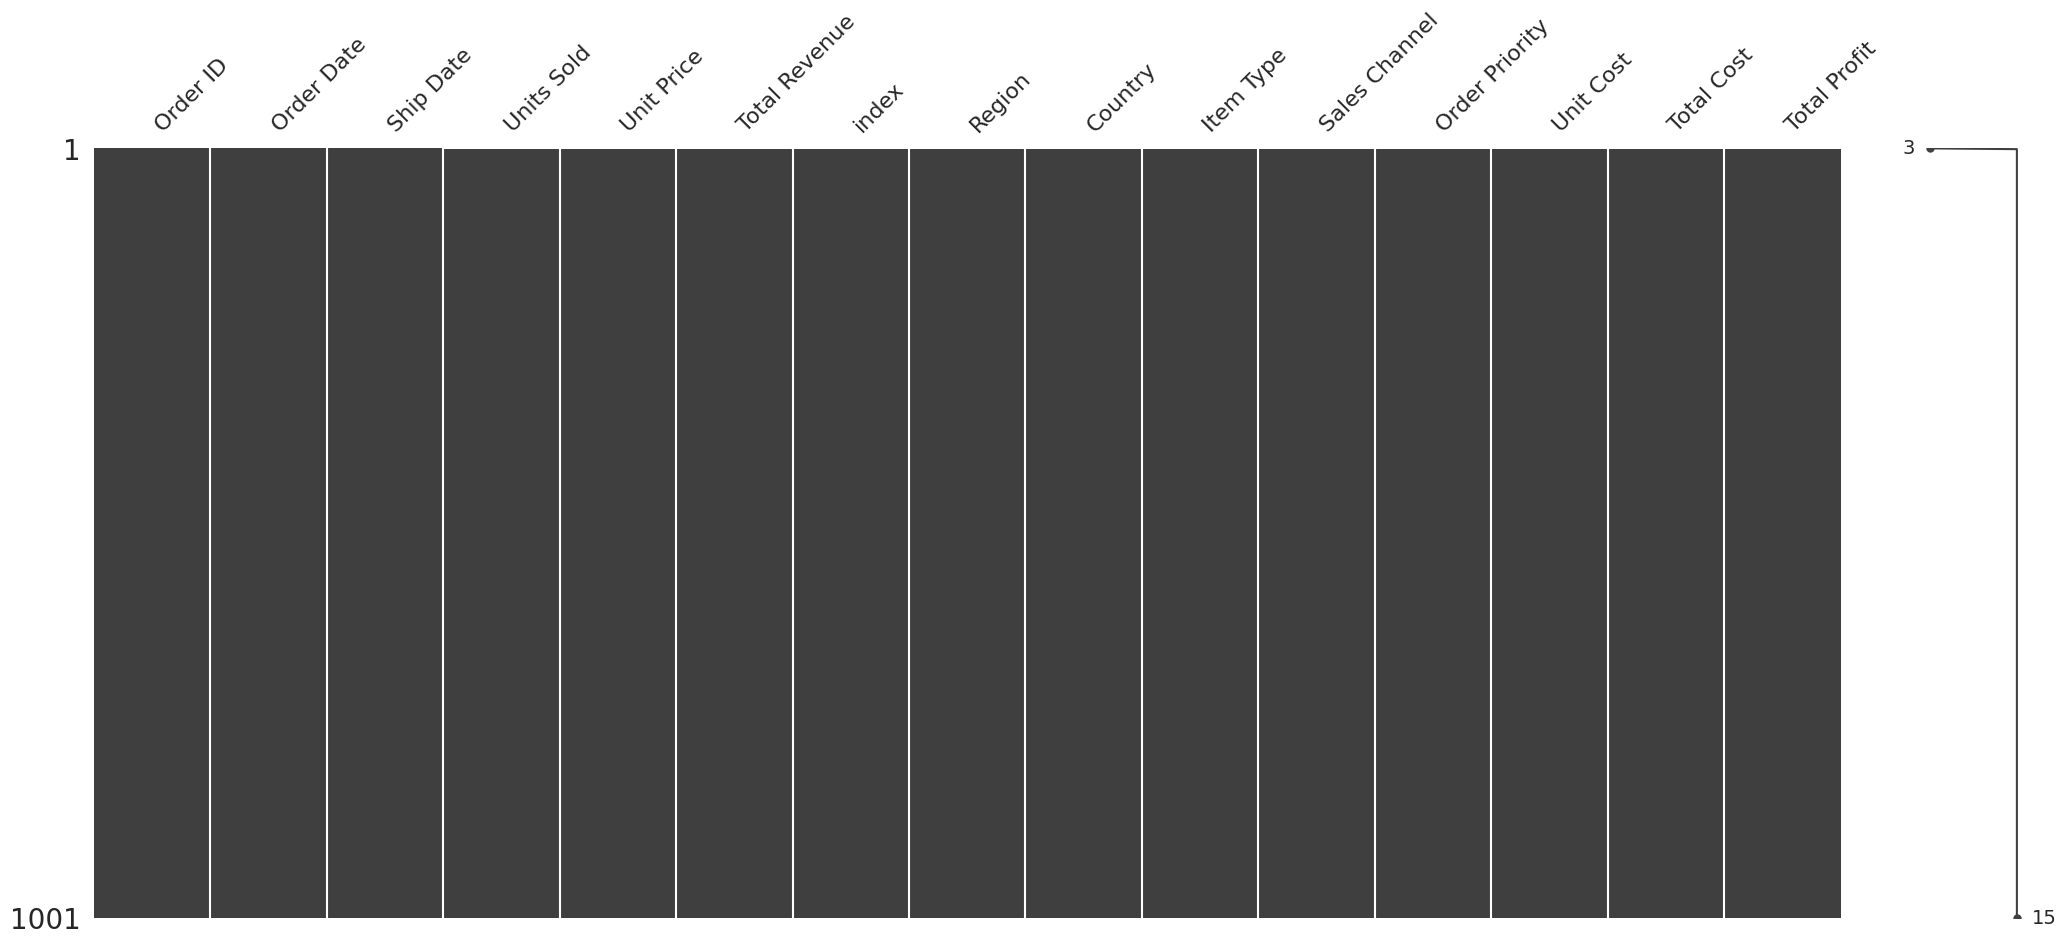


Missing values removed successfully!


In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# 6. Insert a new row as the first record
# Check actual column names first
print("Column Names:", df.columns.tolist())

# Create a new row with correct data types
new_row = pd.DataFrame([{
    "Order ID": "SAPTARSHI_DEB",
    "Order Date": "22BCE2178",
    "Ship Date": "22BCE2178",
    "Units Sold": np.nan,  # Using NaN for numeric fields
    "Unit Price": np.nan,
    "Total Revenue": np.nan
}])

# Concatenate the new row at the top
df = pd.concat([new_row, df], ignore_index=True)

# 7. Check if there are any missing values
print("\n Missing Values Count per Column:\n", df.isna().sum())

# 8. Find the total number of missing values and their distribution across columns
print("\n Total Missing Values:", df.isna().sum().sum())
print("\n Missing Values Distribution:\n", df.isna().sum())

# 9. Find the proportion of missing values in each column
print("\n Proportion of Missing Values:\n", df.isna().mean())

# 10. Visualize missing values using a missing value plot
print("\n Missing Values Visualization - 22BCE2178 :")
msno.matrix(df)
plt.show()

# 11. Perform row-wise deletion of missing values
df.dropna(inplace=True)  # Directly modify df
print("\nMissing values removed successfully!")


In [ ]:
import pandas as pd

#  Ensure column names are clean (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# 12. Create a new dataframe SalesData
sales_data = df[['Order ID', 'Item Type', 'Unit Price', 'Total Revenue']].head(5)
print("\n Sales Data (First 5 Records):\n", sales_data)

# 13. Create another dataframe LocationData
location_data = df[['Order ID', 'Region', 'Country']].head(5)
print("\n Location Data (First 5 Records):\n", location_data)

# 14. Correctly append the two dataframes
combined_data = pd.concat([sales_data, location_data], axis=1)  # Append horizontally (column-wise)
print("\n Combined Data (SalesData + LocationData):\n", combined_data)

# 15. Merge the two dataframes using Order ID as the common key
merged_data = pd.merge(sales_data, location_data, on="Order ID")
print("\n Merged Data (Using Order ID as Key):\n", merged_data)

# 16. Perform Left Join and Right Join
left_join = pd.merge(sales_data, location_data, on="Order ID", how="left")
right_join = pd.merge(sales_data, location_data, on="Order ID", how="right")
print("\n Left Join Result:\n", left_join)
print("\n Right Join Result:\n", right_join)

# 17. Check if 'Total Profit' column exists before filtering
if 'Total Profit' in df.columns:
    filtered_data = df[df['Total Profit'] > 10000]
    print("\n Filtered Data (Total Profit > 10000):\n", filtered_data.head())
else:
    print("\n 'Total Profit' column not found. Skipping filtering step.")

# 18. Sort the dataset based on Total Revenue in descending order
if 'Total Revenue' in df.columns:
    sorted_data = df.sort_values(by="Total Revenue", ascending=False)
    print("\n Sorted Data (By Total Revenue, Descending):\n", sorted_data.head())
else:
    print("\n 'Total Revenue' column not found. Skipping sorting step.")



 Sales Data (First 5 Records):
     Order ID   Item Type  Unit Price  Total Revenue
0  686800706   Cosmetics      437.20     3692591.20
1  185941302  Vegetables      154.06      464953.08
2  246222341   Baby Food      255.28      387259.76
3  161442649      Cereal      205.70      683335.40
4  645713555      Fruits        9.33       91853.85

 Location Data (First 5 Records):
     Order ID                        Region Country
0  686800706  Middle East and North Africa   Libya
1  185941302                 North America  Canada
2  246222341  Middle East and North Africa   Libya
3  161442649                          Asia   Japan
4  645713555            Sub-Saharan Africa    Chad

 Combined Data (SalesData + LocationData):
     Order ID   Item Type  Unit Price  Total Revenue   Order ID  \
0  686800706   Cosmetics      437.20     3692591.20  686800706   
1  185941302  Vegetables      154.06      464953.08  185941302   
2  246222341   Baby Food      255.28      387259.76  246222341   
3  1

In [ ]:
import pandas as pd
import json  # For better structured output

# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# 19. Mean, median, standard deviation, min, max for Unit Price
if 'Unit Price' in df.columns:
    unit_price_stats = {
        "Mean": df['Unit Price'].mean(skipna=True),
        "Median": df['Unit Price'].median(skipna=True),
        "Std Dev": df['Unit Price'].std(skipna=True),
        "Min": df['Unit Price'].min(skipna=True),
        "Max": df['Unit Price'].max(skipna=True)
    }
    print("\n Unit Price Stats:\n", json.dumps(unit_price_stats, indent=4))
else:
    print("\n 'Unit Price' column not found. Skipping stats calculation.")

# 20. Compute IQR and quantiles for Total Revenue
if 'Total Revenue' in df.columns:
    iqr = df['Total Revenue'].quantile(0.75) - df['Total Revenue'].quantile(0.25)
    quantiles = df['Total Revenue'].quantile([0.25, 0.5, 0.75])
    print("\n IQR of Total Revenue:", iqr)
    print("\n Quantiles of Total Revenue:\n", quantiles)
else:
    print("\n 'Total Revenue' column not found. Skipping IQR calculation.")

# 21. Correlation between Total Cost, Total Revenue, and Total Profit
required_cols = ['Total Cost', 'Total Revenue', 'Total Profit']
if all(col in df.columns for col in required_cols):
    correlation_matrix = df[required_cols].dropna().corr()
    print("\n Correlation Matrix:\n", correlation_matrix)
else:
    print("\n Some required columns for correlation are missing. Skipping correlation matrix.")

# 22. Item Type with the highest total revenue
if 'Item Type' in df.columns and 'Total Revenue' in df.columns:
    highest_revenue_item = df.groupby('Item Type', observed=True)['Total Revenue'].sum().idxmax()
    print("\n Item Type with Highest Revenue:", highest_revenue_item)
else:
    print("\n 'Item Type' or 'Total Revenue' column not found. Skipping highest revenue item calculation.")

# 23. Region with the highest sales
if 'Region' in df.columns and 'Units Sold' in df.columns:
    highest_sales_region = df.groupby('Region', observed=True)['Units Sold'].sum().idxmax()
    print("\n Region with Highest Sales:", highest_sales_region)
else:
    print("\n 'Region' or 'Units Sold' column not found. Skipping highest sales region calculation.")




 Unit Price Stats:
 {
    "Mean": 262.10684,
    "Median": 154.06,
    "Std Dev": 216.02106046304345,
    "Min": 9.33,
    "Max": 668.27
}

 IQR of Total Revenue: 1452310.85

 Quantiles of Total Revenue:
 0.25     281191.90
0.50     754939.18
0.75    1733502.75
Name: Total Revenue, dtype: float64

 Correlation Matrix:
                Total Cost  Total Revenue  Total Profit
Total Cost       1.000000       0.987779      0.797041
Total Revenue    0.987779       1.000000      0.881429
Total Profit     0.797041       0.881429      1.000000

 Item Type with Highest Revenue: Office Supplies

 Region with Highest Sales: Sub-Saharan Africa


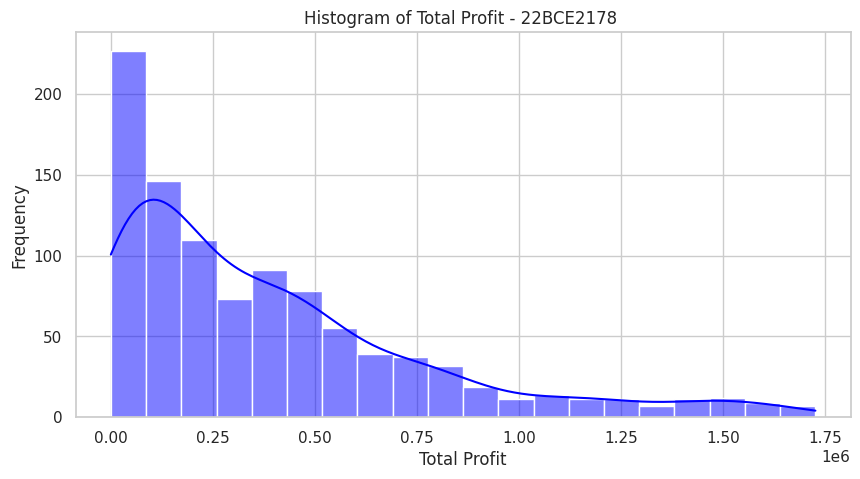

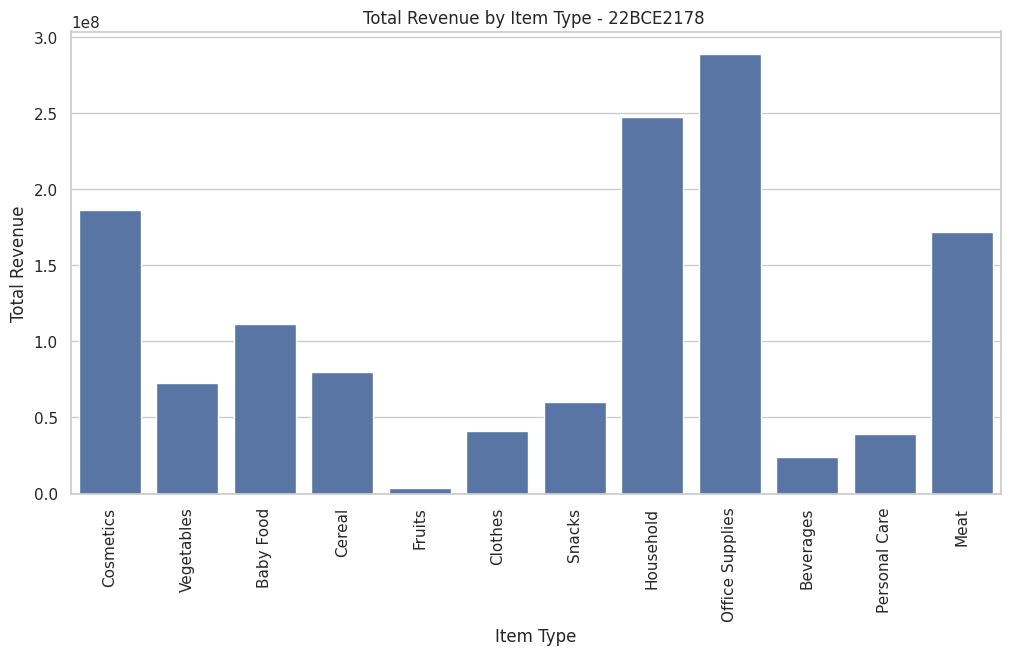

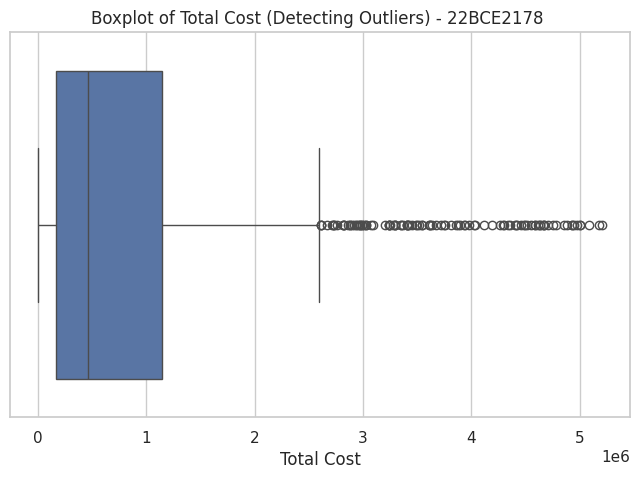

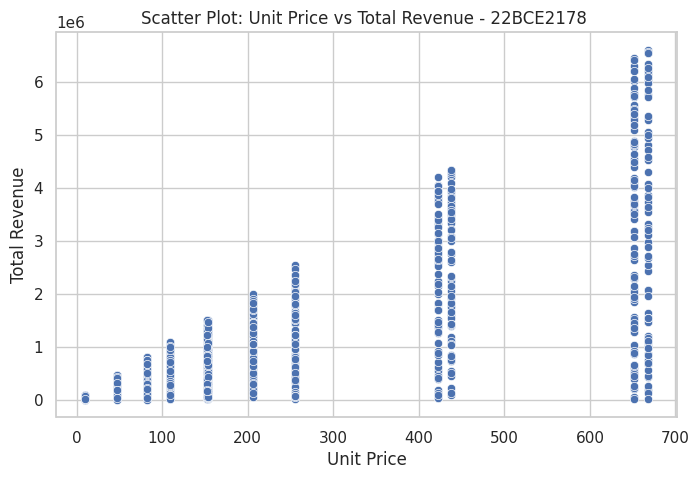

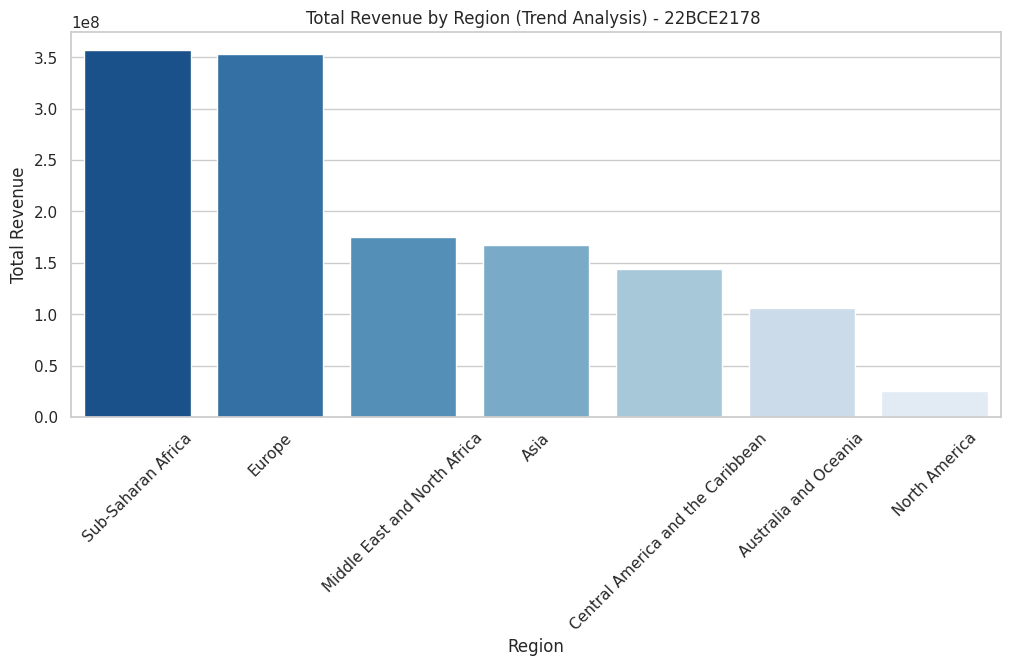

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure Seaborn uses a clean theme
sns.set_theme(style="whitegrid")

# 24. Histogram of Total Profit
plt.figure(figsize=(10, 5))
sns.histplot(df['Total Profit'].dropna(), bins=20, kde=True, color='blue')
plt.title("Histogram of Total Profit - 22BCE2178 ")
plt.xlabel("Total Profit")
plt.ylabel("Frequency")
plt.show()

# 25. Bar chart showing Total Revenue by Item Type (Summing Revenue)
plt.figure(figsize=(12, 6))
sns.barplot(x='Item Type', y='Total Revenue', data=df, estimator=sum, errorbar=None)  # ✅ Fixed deprecated ci
plt.xticks(rotation=90)
plt.title("Total Revenue by Item Type - 22BCE2178 ")
plt.xlabel("Item Type")
plt.ylabel("Total Revenue")
plt.show()

# 26. Boxplot of Total Cost to detect outliers (Horizontal for readability)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Total Cost'].dropna(), orient="h")
plt.title("Boxplot of Total Cost (Detecting Outliers) - 22BCE2178 ")
plt.xlabel("Total Cost")
plt.show()

# 27. Scatter plot of Unit Price vs Total Revenue (Handling missing values)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Unit Price', y='Total Revenue', data=df.dropna(subset=['Unit Price', 'Total Revenue']))
plt.title("Scatter Plot: Unit Price vs Total Revenue - 22BCE2178 ")
plt.xlabel("Unit Price")
plt.ylabel("Total Revenue")
plt.show()

# 28.  Trend Analysis (Using Region)

#  Trend Analysis by 'Region'
if 'Region' in df.columns:
    plt.figure(figsize=(12, 5))

    # Aggregate total revenue per region
    region_trend = df.groupby('Region', observed=True)['Total Revenue'].sum().reset_index()

    # Sort regions by revenue
    region_trend = region_trend.sort_values(by='Total Revenue', ascending=False)

    #  Fix: Assign `hue=x` and `legend=False`
    sns.barplot(x='Region', y='Total Revenue', hue='Region', data=region_trend, palette="Blues_r", legend=False)

    plt.title("Total Revenue by Region (Trend Analysis) - 22BCE2178 ")
    plt.ylabel("Total Revenue")
    plt.xlabel("Region")
    plt.xticks(rotation=45)
    plt.show()

#  Trend Analysis by 'Country'
elif 'Country' in df.columns:
    plt.figure(figsize=(12, 5))

    country_trend = df.groupby('Country', observed=True)['Total Revenue'].sum().reset_index()
    country_trend = country_trend.sort_values(by='Total Revenue', ascending=False)

    #  Fix applied here too
    sns.barplot(x='Country', y='Total Revenue', hue='Country', data=country_trend, palette="Greens_r", legend=False)

    plt.title("Total Revenue by Country (Trend Analysis) - 22BCE2178 ")
    plt.ylabel("Total Revenue")
    plt.xlabel("Country")
    plt.xticks(rotation=45)
    plt.show()

#  Trend Analysis by 'Item Type'
elif 'Item Type' in df.columns:
    plt.figure(figsize=(12, 5))

    item_type_trend = df.groupby('Item Type', observed=True)['Total Revenue'].sum().reset_index()
    item_type_trend = item_type_trend.sort_values(by='Total Revenue', ascending=False)

    #  Fix applied here too
    sns.barplot(x='Item Type', y='Total Revenue', hue='Item Type', data=item_type_trend, palette="Reds_r", legend=False)

    plt.title("Total Revenue by Item Type (Trend Analysis) - 22BCE2178 ")
    plt.ylabel("Total Revenue")
    plt.xlabel("Item Type")
    plt.xticks(rotation=45)
    plt.show()

else:
    print("\n No suitable column found for trend analysis. Skipping plot.")


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 30. Normalize function
def normalize_SalesData(data, new_min, new_max):
    scaler = MinMaxScaler(feature_range=(new_min, new_max))
    return scaler.fit_transform(data)

# Columns to normalize
columns_to_normalize = ['Unit Price', 'Total Revenue', 'Total Profit']

#  Ensure columns exist & drop NaN values before normalization
df_cleaned = df[columns_to_normalize].dropna()

# 31. Normalize to the range [0, 1]
normalized_data_01 = normalize_SalesData(df_cleaned.values, 0, 1)
normalized_df_01 = pd.DataFrame(normalized_data_01, columns=columns_to_normalize, index=df_cleaned.index)
print("\n Normalized Data (Range [0, 1]):\n", normalized_df_01.head().round(4))

# 32. Normalize to the range [-1, 1]
normalized_data_neg11 = normalize_SalesData(df_cleaned.values, -1, 1)
normalized_df_neg11 = pd.DataFrame(normalized_data_neg11, columns=columns_to_normalize, index=df_cleaned.index)
print("\n Normalized Data (Range [-1, 1]):\n", normalized_df_neg11.head().round(4))

# 33. Normalize to the range [-3, 3]
normalized_data_neg33 = normalize_SalesData(df_cleaned.values, -3, 3)
normalized_df_neg33 = pd.DataFrame(normalized_data_neg33, columns=columns_to_normalize, index=df_cleaned.index)
print("\n Normalized Data (Range [-3, 3]):\n", normalized_df_neg33.head().round(4))



 Normalized Data (Range [0, 1]):
             Unit Price  Total Revenue  Total Profit
Order Date                                         
2014-10-18      0.6493         0.5579        0.8507
2011-11-07      0.2196         0.0700        0.1101
2016-10-31      0.3733         0.0582        0.0840
2010-04-10      0.2980         0.1030        0.1702
2011-08-16      0.0000         0.0136        0.0134

 Normalized Data (Range [-1, 1]):
             Unit Price  Total Revenue  Total Profit
Order Date                                         
2014-10-18      0.2987         0.1158        0.7014
2011-11-07     -0.5607        -0.8600       -0.7798
2016-10-31     -0.2535        -0.8835       -0.8321
2010-04-10     -0.4040        -0.7940       -0.6595
2011-08-16     -1.0000        -0.9728       -0.9731

 Normalized Data (Range [-3, 3]):
             Unit Price  Total Revenue  Total Profit
Order Date                                         
2014-10-18      0.8960         0.3474        2.1041
2011-11-0

Chi-Square Test Results: 7.848940679847964 0.2493805586210492


<Figure size 1200x600 with 0 Axes>

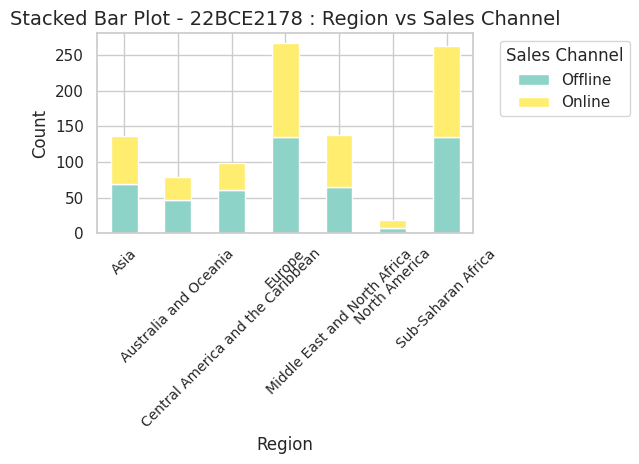

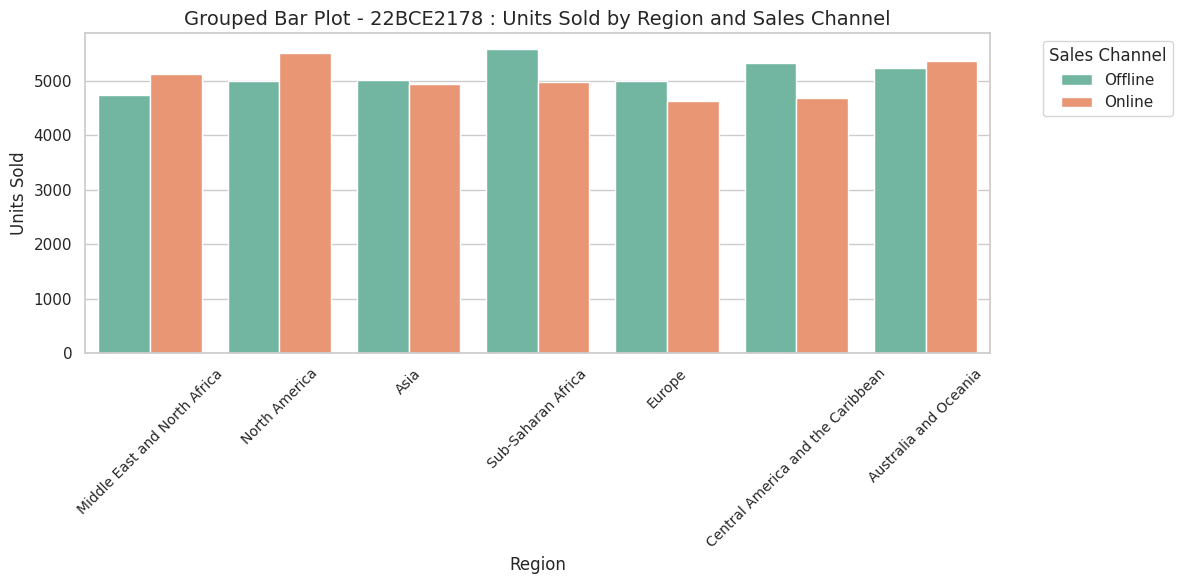

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 34. Contingency Tables
region_sales_channel_table = pd.crosstab(df['Region'], df['Sales Channel'])
units_sold_revenue_corr = df[['Units Sold', 'Total Revenue']].corr()

#   observed=True in groupby()
product_units_sold_agg = df.groupby('Item Type', observed=True)['Units Sold'].sum()

# 35. 3-Way Contingency Table
three_way_table = pd.crosstab([df['Region'], df['Sales Channel']], df['Item Type'])

# 36. Chi-Square Test
chi2, p, dof, expected = chi2_contingency(region_sales_channel_table)
print("Chi-Square Test Results:", chi2, p)

# 37. Stacked Bar Plot
plt.figure(figsize=(12, 6))
region_sales_channel_table.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Stacked Bar Plot - 22BCE2178 : Region vs Sales Channel", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sales Channel", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 38. Grouped Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Units Sold', hue='Sales Channel', data=df, errorbar=None, palette='Set2')
plt.title("Grouped Bar Plot - 22BCE2178 : Units Sold by Region and Sales Channel", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sales Channel", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


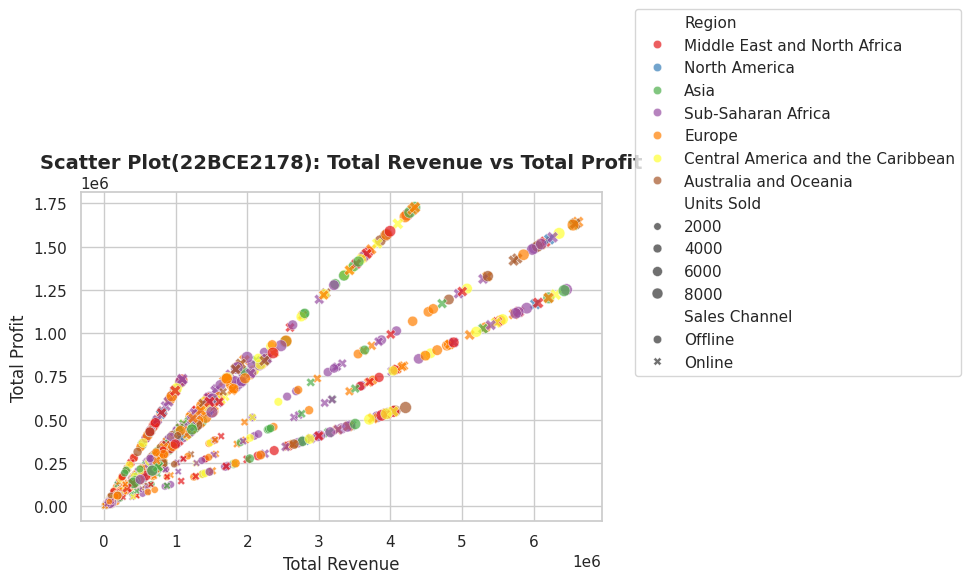

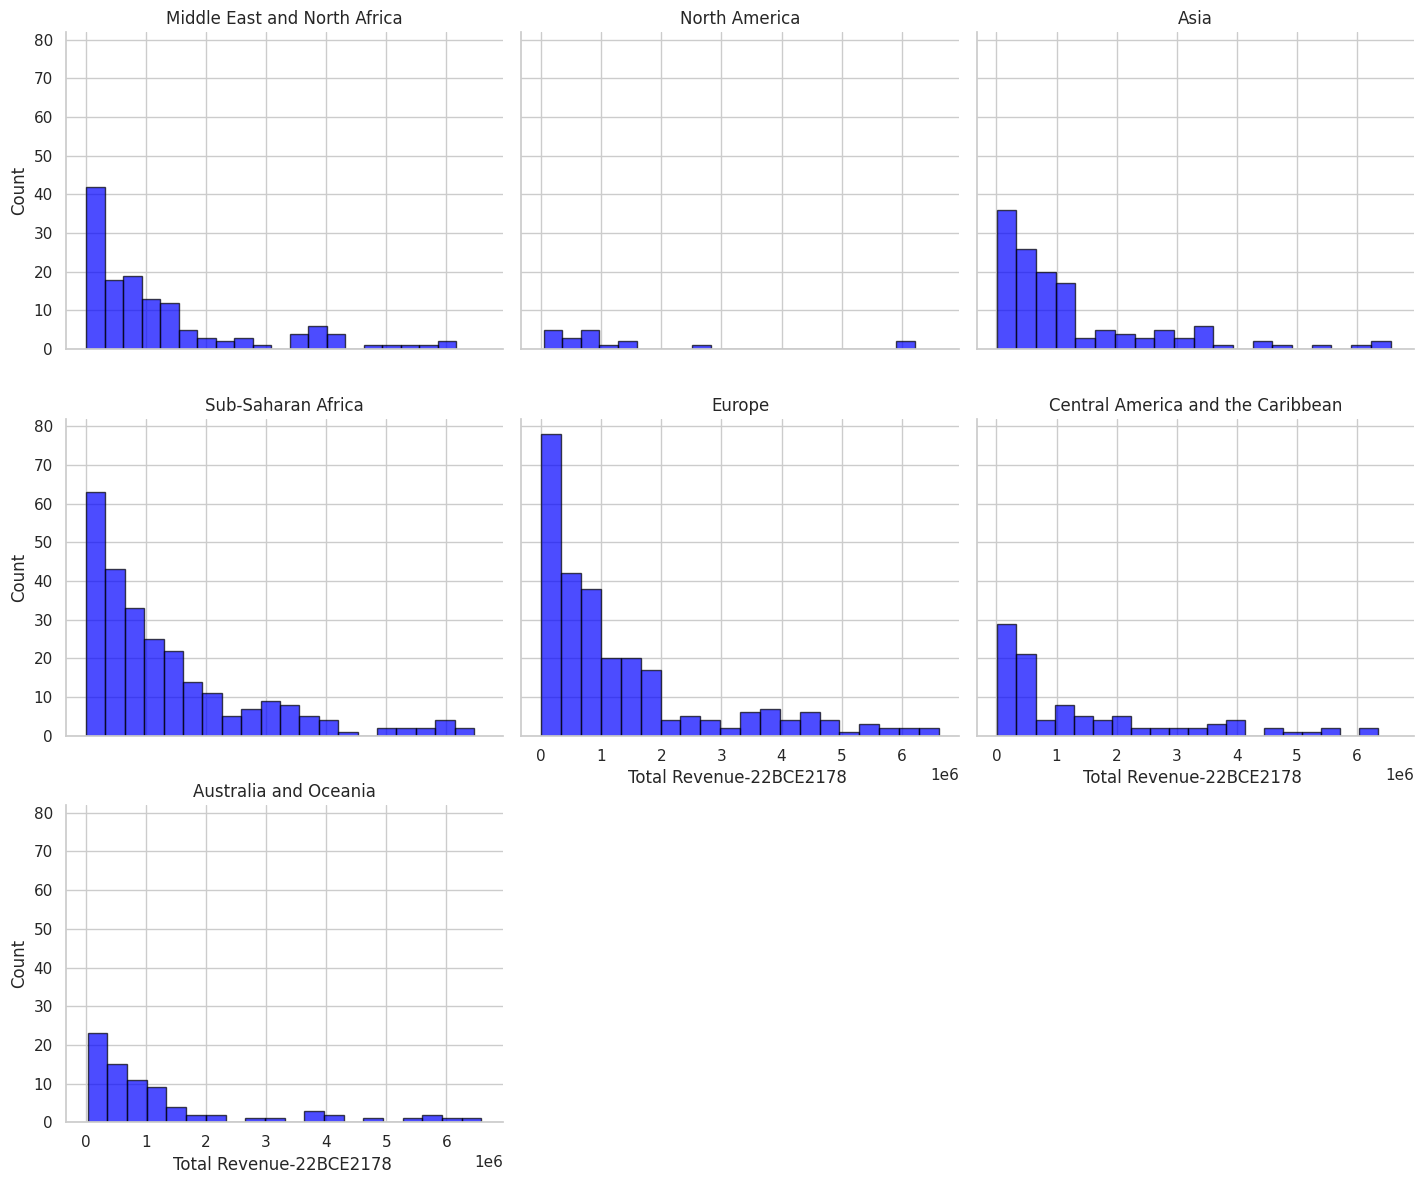

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = df.reset_index()
#categorical variables are strings
df['Region'] = df['Region'].astype(str)
df['Sales Channel'] = df['Sales Channel'].astype(str)

# Scatter Plot with better readability
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Total Revenue',
    y='Total Profit',
    hue='Region',         # Color by Region
    style='Sales Channel',  # Shape by Sales Channel
    size='Units Sold',      # Size by Units Sold
    data=df,
    alpha=0.7,
    palette='Set1'
)
plt.title("Scatter Plot(22BCE2178): Total Revenue vs Total Profit", fontsize=14, fontweight='bold')
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='center left')
plt.tight_layout()
plt.show()


g = sns.FacetGrid(df, col='Region', col_wrap=3, height=4, aspect=1.2)
g.map(plt.hist, 'Total Revenue', bins=20, color='blue', edgecolor='black', alpha=0.7)
g.set_titles("{col_name}")
g.set_axis_labels("Total Revenue-22BCE2178 ", "Count")
plt.tight_layout()
plt.show()


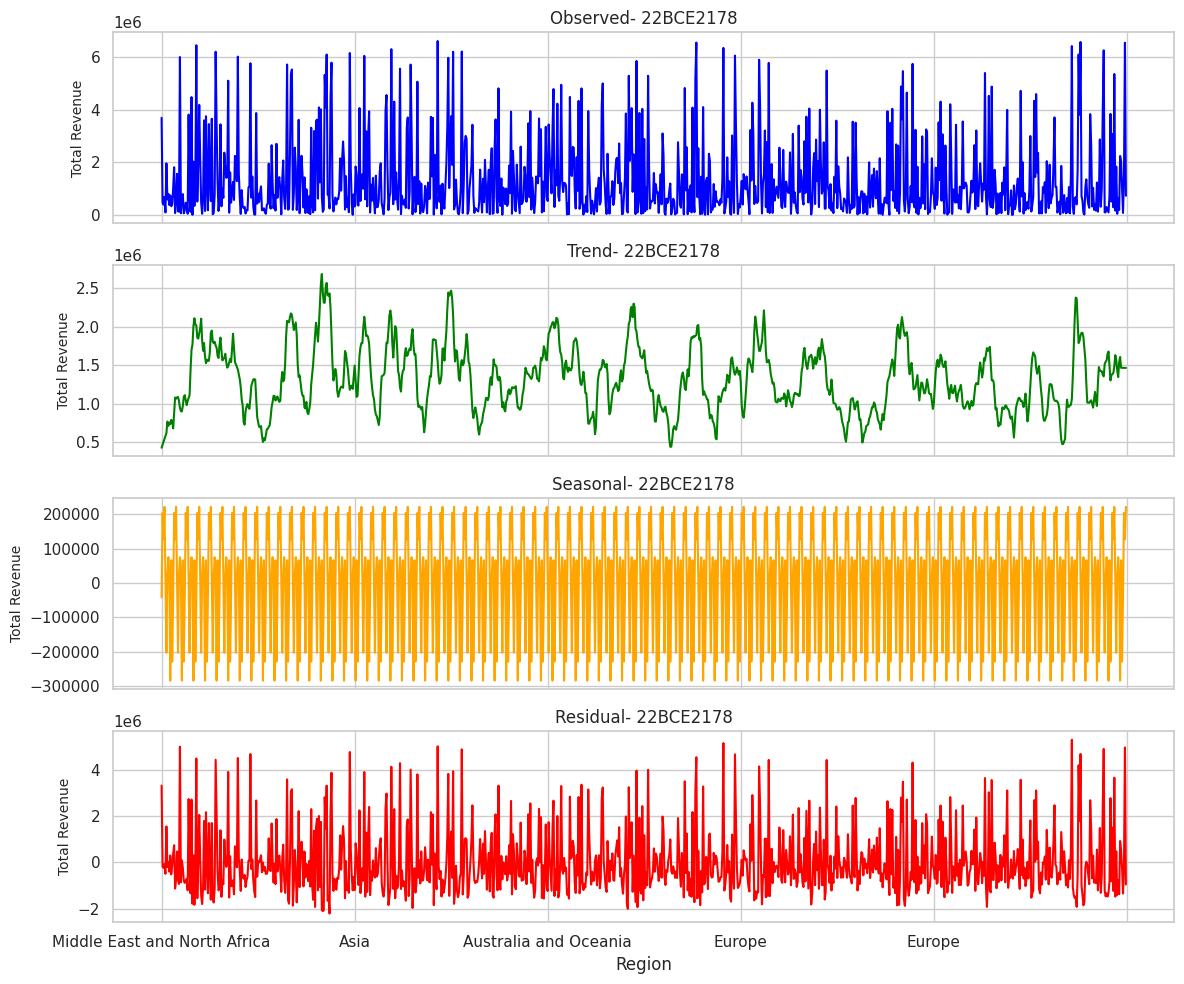

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/1000%20Sales%20Records.csv"
df = pd.read_csv(url)

#  Replace 'Order Date' with a different existing column (e.g., 'Region')
df.set_index('Region', inplace=True)  # Using 'Region' as the index

# Ensure 'Total Revenue' is numeric
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

#  Drop NaN values in 'Total Revenue'
df = df.dropna(subset=['Total Revenue'])

#  Perform time series decomposition (Using categorical index)
period = 12  # Default periodicity
result = seasonal_decompose(df['Total Revenue'], model='additive', period=period, extrapolate_trend='freq')

#  Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Observed
result.observed.plot(ax=axes[0], color='blue')
axes[0].set_title("Observed- 22BCE2178", fontsize=12)
axes[0].set_ylabel("Total Revenue", fontsize=10)

# Trend
result.trend.plot(ax=axes[1], color='green')
axes[1].set_title("Trend- 22BCE2178", fontsize=12)
axes[1].set_ylabel("Total Revenue", fontsize=10)

# Seasonal
result.seasonal.plot(ax=axes[2], color='orange')
axes[2].set_title("Seasonal- 22BCE2178", fontsize=12)
axes[2].set_ylabel("Total Revenue", fontsize=10)

# Residual
result.resid.plot(ax=axes[3], color='red')
axes[3].set_title("Residual- 22BCE2178", fontsize=12)
axes[3].set_ylabel("Total Revenue", fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


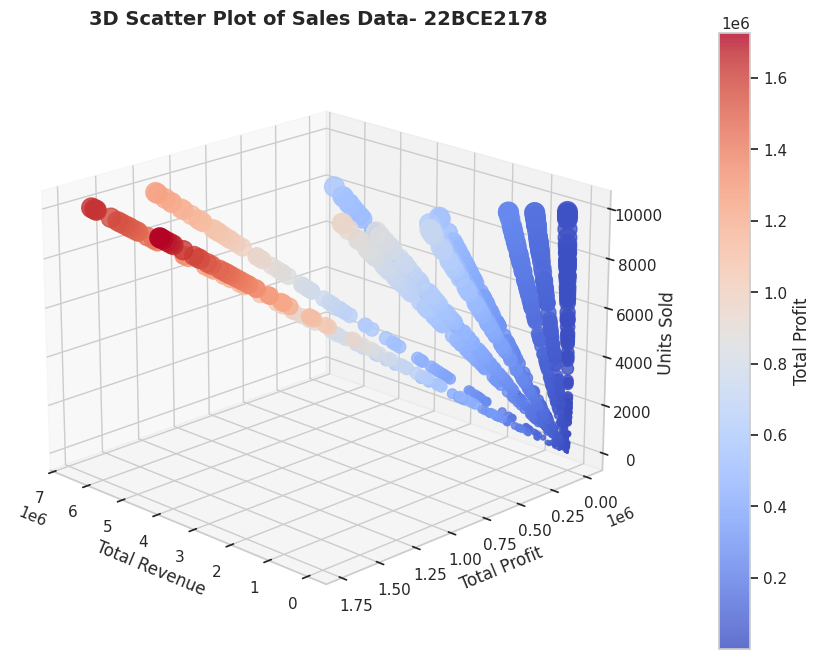

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

#  Ensure there are no NaN values
df = df.dropna(subset=['Total Revenue', 'Total Profit', 'Units Sold'])

#  Create 3D scatter plot
fig = plt.figure(figsize=(12, 8))  # Increased figure size
ax = fig.add_subplot(111, projection='3d')

#  Scatter plot with better color and size mapping
scatter = ax.scatter(
    df['Total Revenue'],
    df['Total Profit'],
    df['Units Sold'],
    c=df['Total Profit'],   #  Color by profit
    cmap='coolwarm',        #  Colormap for better visualization
    s=df['Units Sold'] / 50,  #  Scale points based on 'Units Sold'
    alpha=0.8
)

#  Labels
ax.set_xlabel('Total Revenue', fontsize=12)
ax.set_ylabel('Total Profit', fontsize=12)
ax.set_zlabel('Units Sold', fontsize=12)
ax.set_title('3D Scatter Plot of Sales Data- 22BCE2178', fontsize=14, fontweight='bold')

#  Add color bar for reference
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Total Profit', fontsize=12)

#  Adjust viewing angle for better clarity
ax.view_init(elev=20, azim=135)

plt.show()



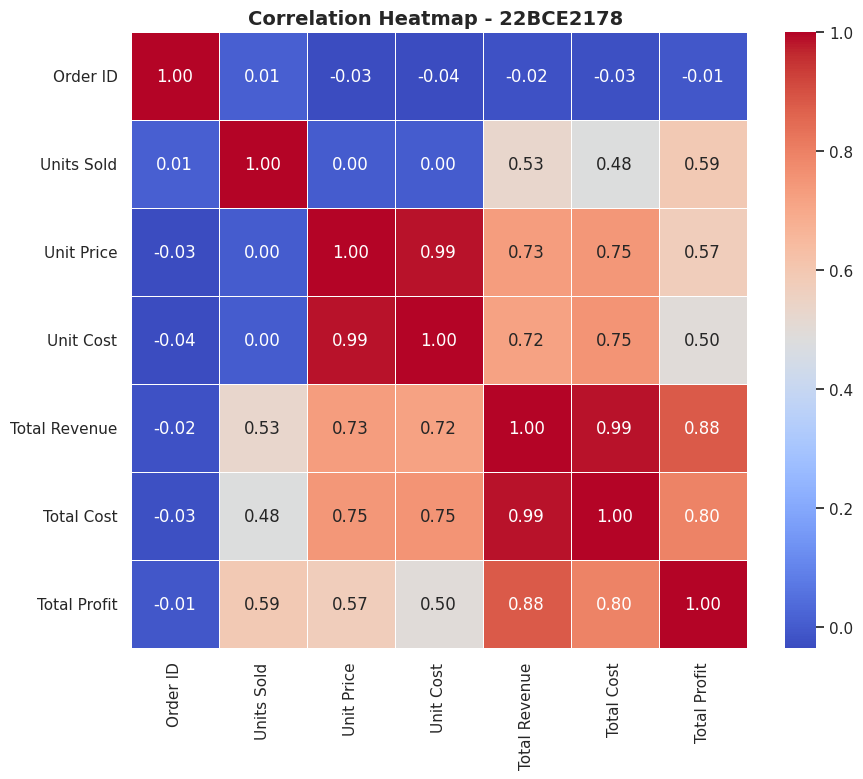

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/1000%20Sales%20Records.csv"
df = pd.read_csv(url)

# Strip spaces from column names to avoid errors
df.columns = df.columns.str.strip()

# Ensure categorical variables are properly formatted
df['Region'] = df['Region'].astype(str)
df['Sales Channel'] = df['Sales Channel'].astype(str)

# Identify numerical columns dynamically
numerical_columns = df.select_dtypes(include=['number']).columns

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap - 22BCE2178 ", fontsize=14, fontweight='bold')
plt.show()


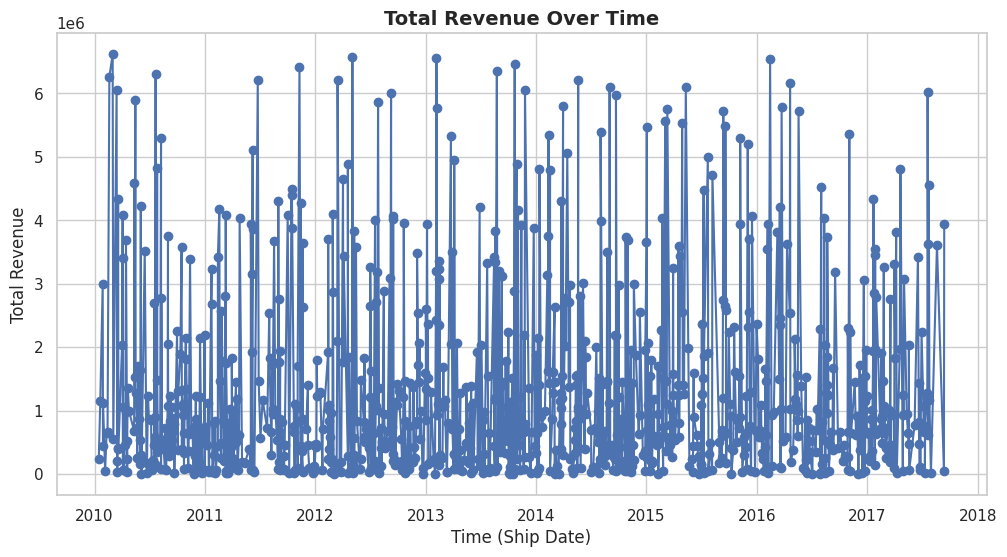

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px

#
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/1000%20Sales%20Records.csv"
df = pd.read_csv(url)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert 'Ship Date' to datetime format (since 'Order ID' does not exist)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Set 'Ship Date' as the index
df = df.sort_values(by='Ship Date')  # Sort by time
df.set_index('Ship Date', inplace=True)

# Ensure 'Total Revenue' is numeric
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

# Drop NaN values in 'Total Revenue'
df = df.dropna(subset=['Total Revenue'])

# 46-47: Plot Time-Series Data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total Revenue'], marker='o', linestyle='-', color='b')
plt.title("Total Revenue Over Time - 22BCE2178 ", fontsize=14, fontweight='bold')
plt.xlabel("Time (Ship Date)", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True)
plt.show()

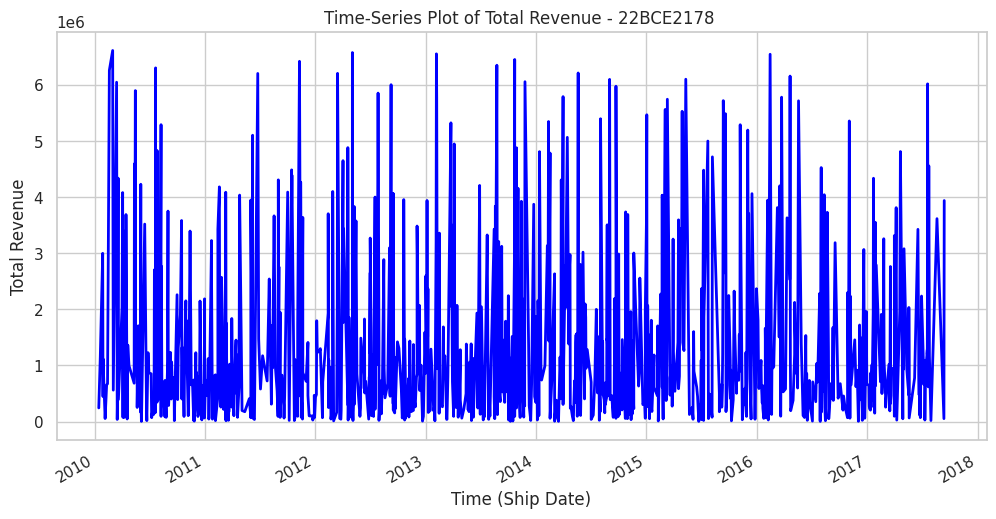

In [ ]:
# 48: Time-Series Object Plot
plt.figure(figsize=(12, 6))
df['Total Revenue'].plot(title="Time-Series Plot of Total Revenue - 22BCE2178 ", color='blue', linewidth=2)
plt.xlabel("Time (Ship Date)", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True)
plt.show()

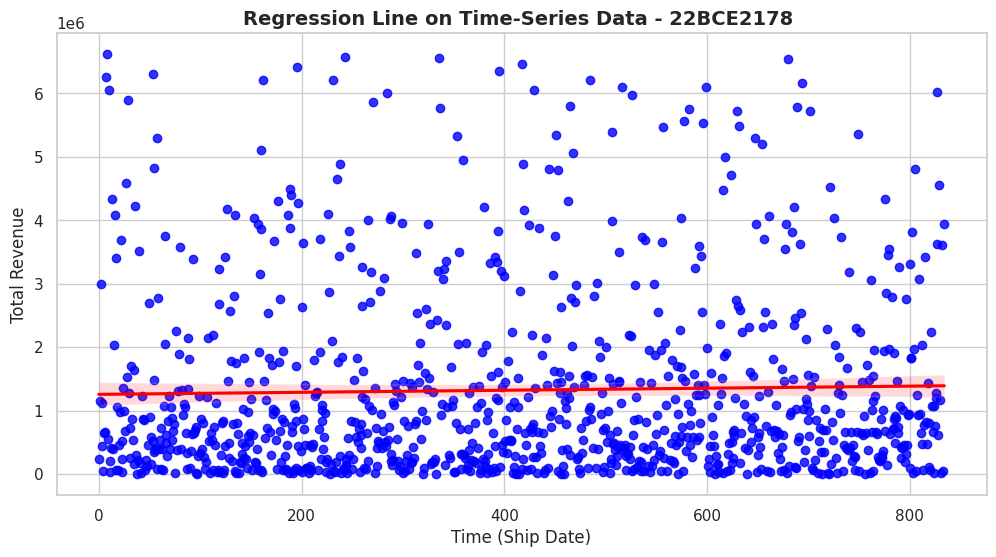

In [ ]:
 #49: Regression Line on Time-Series Data
plt.figure(figsize=(12, 6))
sns.regplot(x=df.index.factorize()[0], y=df['Total Revenue'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Line on Time-Series Data - 22BCE2178 ", fontsize=14, fontweight='bold')
plt.xlabel("Time (Ship Date)", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True)
plt.show()


 Seasonal Cycle Pattern:
 Month
1     1.158173e+06
2     1.677868e+06
3     1.464166e+06
4     1.576968e+06
5     1.319283e+06
6     1.123680e+06
7     1.306837e+06
8     1.395940e+06
9     1.316353e+06
10    1.208200e+06
11    1.248780e+06
12    1.074162e+06
Name: Total Revenue, dtype: float64


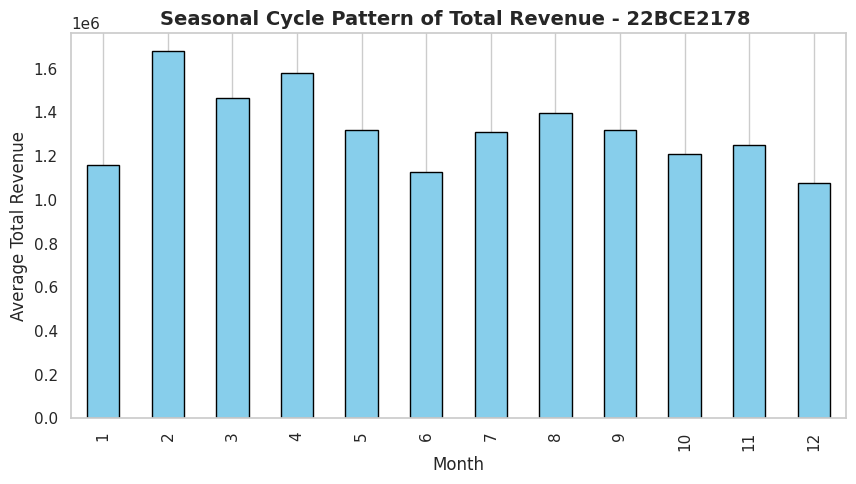

In [ ]:
#  50: Print & Plot Seasonal Cycle Pattern
df['Month'] = df.index.month
seasonal_pattern = df.groupby('Month')['Total Revenue'].mean()
print("\n Seasonal Cycle Pattern:\n", seasonal_pattern)

plt.figure(figsize=(10, 5))
seasonal_pattern.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Seasonal Cycle Pattern of Total Revenue - 22BCE2178 ", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Total Revenue", fontsize=12)
plt.grid(axis='y')
plt.show()

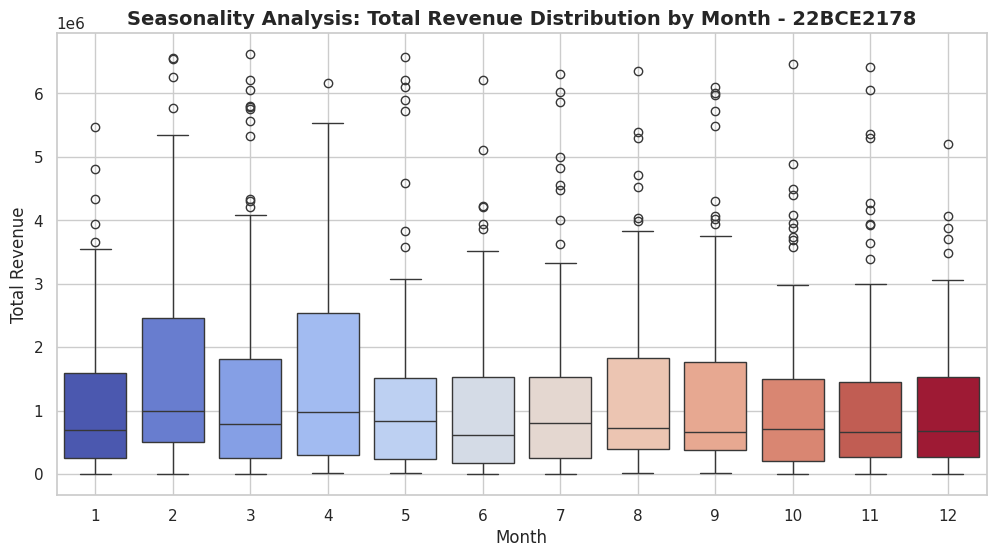

In [ ]:
# Boxplot for Seasonal Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Month'], y=df['Total Revenue'], hue=df['Month'], palette="coolwarm", legend=False)
plt.title("Seasonality Analysis: Total Revenue Distribution by Month - 22BCE2178", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
# 54: 3D Scatter Plot with Modifications
fig = px.scatter_3d(df, x='Total Revenue', y='Total Profit', z='Units Sold',
                     color='Region', symbol='Sales Channel', size='Units Sold',
                     title="Enhanced 3D Scatter Plot of Sales Data - 22BCE2178 ",
                     labels={'Total Revenue': 'Total Revenue ($)', 'Total Profit': 'Total Profit ($)', 'Units Sold': 'Units Sold'},
                     opacity=0.8)
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Prepare Data for 3D Bar Plot
df_grouped = df.groupby(['Region', 'Sales Channel'])['Total Revenue'].sum().reset_index()

# Generate bar heights (z-values)
z_values = df_grouped['Total Revenue']

# Generate x, y positions for bars
x_values = df_grouped['Region']
y_values = df_grouped['Sales Channel']

# Generate bar bottom values (set all to zero for starting point)
z_bottom = np.zeros_like(z_values)

# Create 3D Bar Chart using `Scatter3d` with mode `markers`
fig = go.Figure()

for i in range(len(df_grouped)):
    fig.add_trace(go.Scatter3d(
        x=[x_values[i], x_values[i]],
        y=[y_values[i], y_values[i]],
        z=[z_bottom[i], z_values[i]],  # Bottom and Top values
        mode='lines',
        line=dict(color='blue', width=10)
    ))

# Update Layout
fig.update_layout(
    title="3D Bar Plot of Total Revenue by Region and Sales Channel - 22BCE2178",
    scene=dict(
        xaxis_title="Region",
        yaxis_title="Sales Channel",
        zaxis_title="Total Revenue ($)",
        camera=dict(eye=dict(x=1.2, y=1.2, z=1.2))  # Adjust camera view
    )
)

# Show Plot
fig.show()


First 5 rows of the dataset:
                         Region Country   Item Type Sales Channel  \
0  Middle East and North Africa   Libya   Cosmetics       Offline   
1                 North America  Canada  Vegetables        Online   
2  Middle East and North Africa   Libya   Baby Food       Offline   
3                          Asia   Japan      Cereal       Offline   
4            Sub-Saharan Africa    Chad      Fruits       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M  10/18/2014  686800706  10/31/2014        8446      437.20   
1              M   11/7/2011  185941302   12/8/2011        3018      154.06   
2              C  10/31/2016  246222341   12/9/2016        1517      255.28   
3              C   4/10/2010  161442649   5/12/2010        3322      205.70   
4              H   8/16/2011  645713555   8/31/2011        9845        9.33   

   Unit Cost  Total Revenue  Total Cost  Total Profit  
0     263.33     3692591.

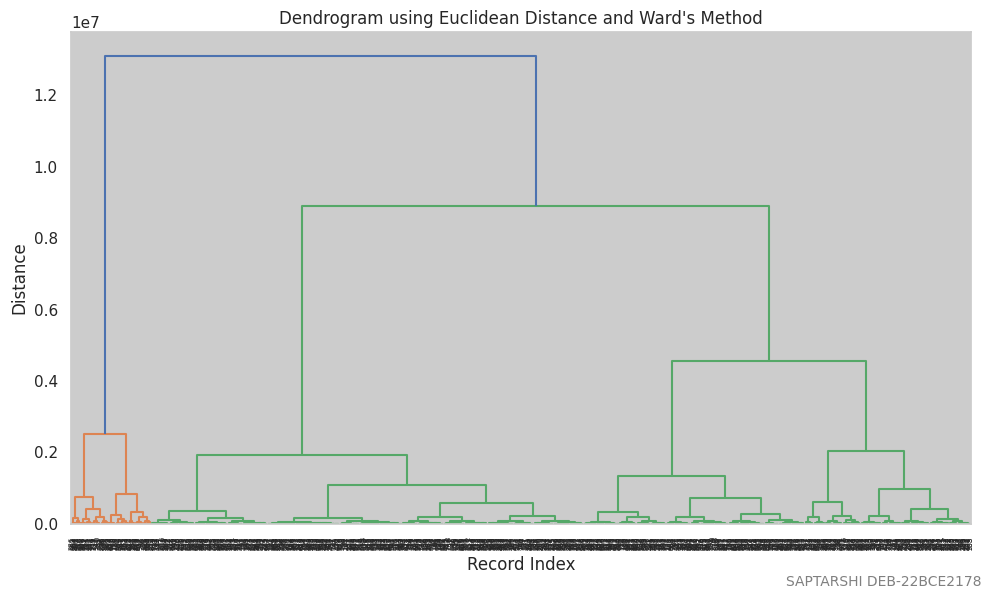


--- Manhattan Distance Analysis ---

Distance Matrix using Cityblock metric:
Matrix shape: (1000, 1000)
          0           1           2           3           4          5    \
0        0.00  1283407.68  1330015.40  1179334.04  1446178.57  625502.50   
1  1283407.68        0.00    46607.72   104073.64   173626.89  660069.18   
2  1330015.40    46607.72        0.00   150681.36   130021.17  706676.90   
3  1179334.04   104073.64   150681.36        0.00   277092.53  555995.54   
4  1446178.57   173626.89   130021.17   277092.53        0.00  820676.07   
5   625502.50   660069.18   706676.90   555995.54   820676.07       0.00   
6  1222158.06    61597.62   107857.34    42824.02   235224.51  598819.56   
7   933614.46   349793.22   396400.94   245719.58   514858.11  310275.96   
8  1321244.38    37836.70     8771.02   141910.34   136970.19  697905.88   
9  1169128.02   114279.66   160887.38    10206.02   284342.55  545789.52   

          6          7           8           9    ...     

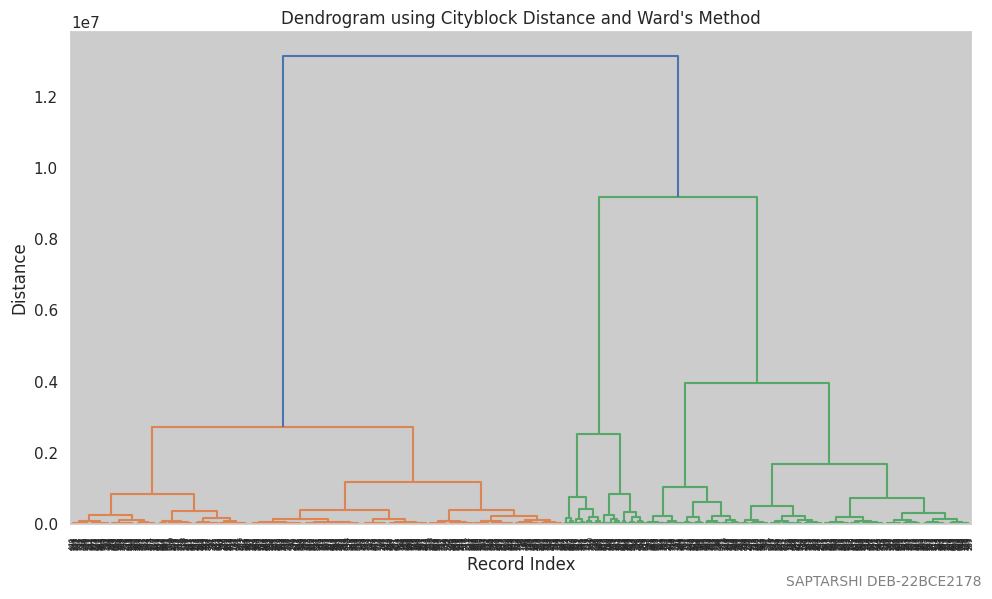


--- Maximum (Chebyshev) Distance Analysis ---

Distance Matrix using Chebyshev metric:
Matrix shape: (1000, 1000)
          0           1           2           3           4          5    \
0        0.00  1277979.68  1323086.40  1174210.04  1444779.57  624420.50   
1  1277979.68        0.00    45106.72   103769.64   166799.89  653559.18   
2  1323086.40    45106.72        0.00   148876.36   121693.17  698665.90   
3  1174210.04   103769.64   148876.36        0.00   270569.53  549789.54   
4  1444779.57   166799.89   121693.17   270569.53        0.00  820359.07   
5   624420.50   653559.18   698665.90   549789.54   820359.07       0.00   
6  1216556.06    61423.62   106530.34    42346.02   228223.51  592135.56   
7   932467.46   345512.22   390618.94   241742.58   512312.11  308046.96   
8  1315226.38    37246.70     7860.02   141016.34   129553.19  690805.88   
9  1165482.02   112497.66   157604.38     8728.02   279297.55  541061.52   

          6          7           8           9  

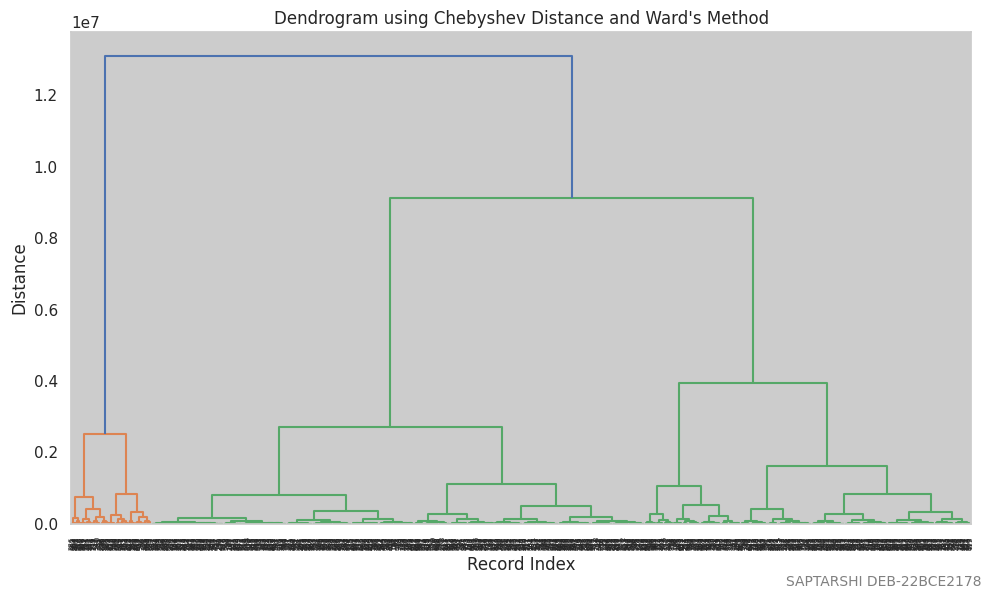


--- Canberra Distance Analysis ---

Distance Matrix using Canberra metric:
Matrix shape: (1000, 1000)
        0         1         2         3         4         5         6    \
0  0.000000  1.243799  1.515267  1.101522  1.044686  0.330207  1.203304   
1  1.243799  0.000000  0.465249  0.261986  1.309266  1.150586  0.168501   
2  1.515267  0.465249  0.000000  0.711585  1.452426  1.431382  0.572377   
3  1.101522  0.261986  0.711585  0.000000  1.346193  0.965914  0.155044   
4  1.044686  1.309266  1.452426  1.346193  0.000000  0.961682  1.379605   
5  0.330207  1.150586  1.431382  0.965914  0.961682  0.000000  1.080504   
6  1.203304  0.168501  0.572377  0.155044  1.379605  1.080504  0.000000   
7  0.538025  0.890488  1.229063  0.665586  1.063734  0.355668  0.799743   
8  1.364404  0.216673  0.257239  0.470545  1.336248  1.286475  0.322400   
9  0.933149  0.455871  0.871156  0.196587  1.199259  0.801657  0.347917   

        7         8         9    ...       990       991       992     

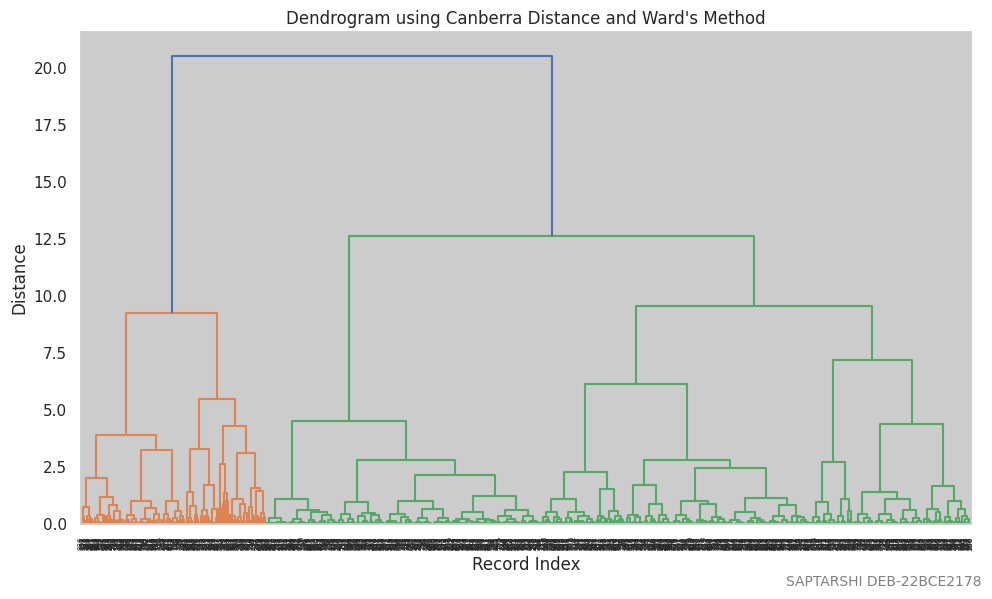


--- Binary Distance Analysis ---

Data after binary conversion (first 5 rows):
   Units Sold  Total Profit
0           1             1
1           0             0
2           0             0
3           0             1
4           1             0

Distance Matrix using Euclidean metric:
Matrix shape: (1000, 1000)
        0         1         2         3         4         5         6    \
0  0.000000  1.414214  1.414214  1.000000  1.000000  0.000000  1.414214   
1  1.414214  0.000000  0.000000  1.000000  1.000000  1.414214  0.000000   
2  1.414214  0.000000  0.000000  1.000000  1.000000  1.414214  0.000000   
3  1.000000  1.000000  1.000000  0.000000  1.414214  1.000000  1.000000   
4  1.000000  1.000000  1.000000  1.414214  0.000000  1.000000  1.000000   
5  0.000000  1.414214  1.414214  1.000000  1.000000  0.000000  1.414214   
6  1.414214  0.000000  0.000000  1.000000  1.000000  1.414214  0.000000   
7  0.000000  1.414214  1.414214  1.000000  1.000000  0.000000  1.414214   
8  1.4142

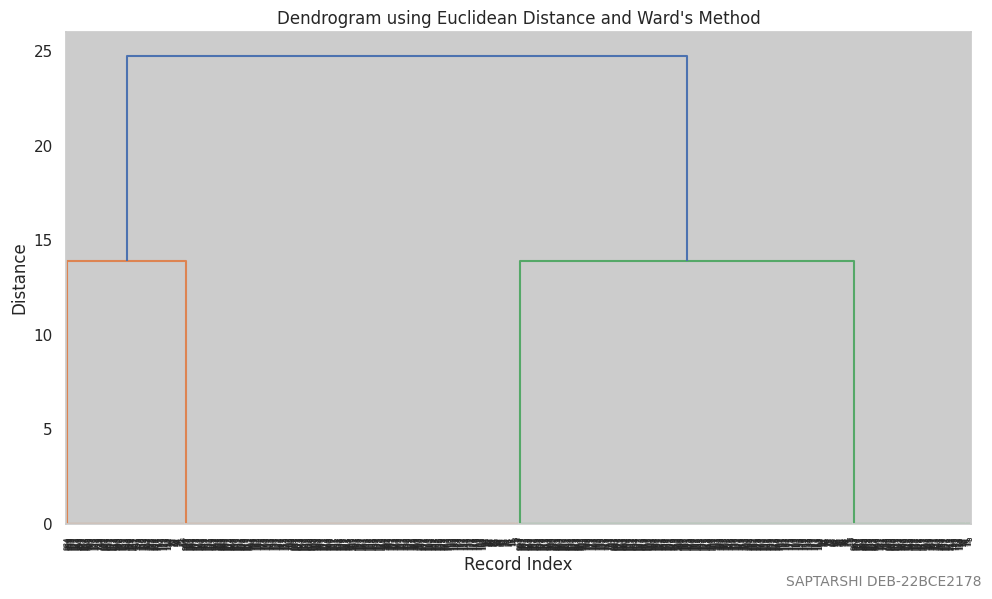


--- Minkowski Distance Analysis (p=3) ---

Distance Matrix using Minkowski metric:
Matrix shape: (1000, 1000)
            0             1             2             3             4    \
0  0.000000e+00  1.277980e+06  1.323086e+06  1.174210e+06  1.444780e+06   
1  1.277980e+06  0.000000e+00  4.510727e+04  1.037696e+05  1.668037e+05   
2  1.323086e+06  4.510727e+04  0.000000e+00  1.488764e+05  1.217062e+05   
3  1.174210e+06  1.037696e+05  1.488764e+05  0.000000e+00  2.705708e+05   
4  1.444780e+06  1.668037e+05  1.217062e+05  2.705708e+05  0.000000e+00   
5  6.244205e+05  6.535594e+05  6.986663e+05  5.497898e+05  8.203591e+05   
6  1.216556e+06  6.142362e+04  1.065304e+05  4.234604e+04  2.282257e+05   
7  9.324675e+05  3.455124e+05  3.906194e+05  2.417429e+05  5.123121e+05   
8  1.315226e+06  3.724675e+04  7.864097e+03  1.410164e+05  1.295613e+05   
9  1.165482e+06  1.124978e+05  1.576049e+05  8.742125e+03  2.792981e+05   

             5             6              7             8      

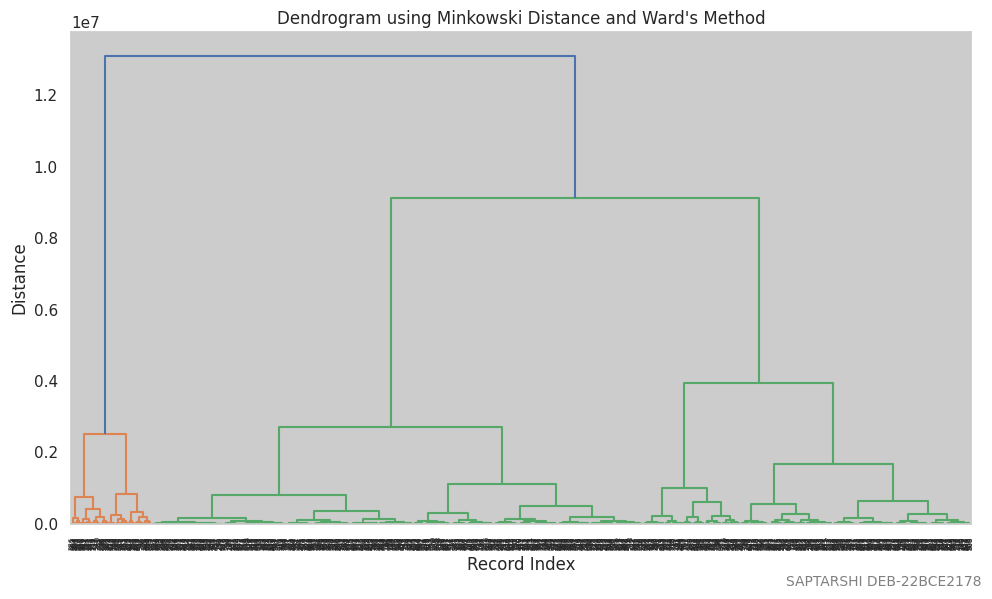

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Set visualization style
sns.set(style="whitegrid")

# ---------------------------------------------------------
# 1. Load the Dataset and Clean the Data
# ---------------------------------------------------------
# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/1000%20Sales%20Records.csv"
df = pd.read_csv(url)

# Display basic information and first few rows to inspect the data
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing Values in each column:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())

# ---------------------------------------------------------
# 2. Extract Key Variables into 'dataset'
# ---------------------------------------------------------
# For this analysis, we select two key numerical columns: "Units Sold" and "Total Profit".
# Verify the column names (case-sensitive). Adjust them if necessary.
# You can check available column names using: print(df.columns.tolist())
dataset = df[["Units Sold", "Total Profit"]]
print("\nExtracted Dataset (first 5 rows):")
print(dataset.head())

# ---------------------------------------------------------
# 3. Function to Compute Distance Matrix and Plot Dendrogram
# ---------------------------------------------------------
def compute_and_plot(metric, data, minkowski_p=3, binary_convert=False):
    """
    Computes the distance matrix using the specified metric and plots the dendrogram.

    Parameters:
      metric (str): The distance metric to use ('euclidean', 'cityblock', 'chebyshev',
                    'canberra', 'minkowski', etc.).
      data (DataFrame): The DataFrame containing the selected variables.
      minkowski_p (int): The parameter p for the Minkowski distance (only used if metric == 'minkowski').
      binary_convert (bool): If True, convert the data to binary using median threshold.
    """
    # Optionally convert the data to binary (0/1) using the median as threshold
    data_to_use = data.copy()
    if binary_convert:
        for col in data_to_use.columns:
            median_val = data_to_use[col].median()
            data_to_use[col] = (data_to_use[col] > median_val).astype(int)
        print(f"\nData after binary conversion (first 5 rows):\n{data_to_use.head()}")

    # Compute the distance matrix using the specified metric
    if metric == "minkowski":
        distances = pdist(data_to_use.values, metric=metric, p=minkowski_p)
    else:
        distances = pdist(data_to_use.values, metric=metric)

    # Convert the condensed distance matrix into a square form for display
    square_dist = squareform(distances)

    # Note: For large datasets, printing the full matrix can be overwhelming.
    # Here, we display the shape and the first 10 rows of the distance matrix.
    print(f"\nDistance Matrix using {metric.capitalize()} metric:")
    print("Matrix shape:", square_dist.shape)
    print(pd.DataFrame(square_dist).head(10))

    # Perform hierarchical clustering using Ward's method
    Z = linkage(distances, method='ward')

    # Plot the dendrogram using a basic plot function
    plt.figure(figsize=(10, 6))
    dendrogram(Z, labels=data_to_use.index.astype(str), leaf_rotation=90)
    plt.title(f"Dendrogram using {metric.capitalize()} Distance and Ward's Method")
    plt.xlabel("Record Index")
    plt.ylabel("Distance")

    # Add your name and registration number as annotation in the bottom right corner
    plt.figtext(0.99, 0.01, "SAPTARSHI DEB-22BCE2178", horizontalalignment='right', fontsize=10, color='gray')

    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------
# 4. Compute and Visualize Distance Matrices and Dendrograms
# ---------------------------------------------------------
# (a) Euclidean Distance
print("\n--- Euclidean Distance Analysis ---")
compute_and_plot(metric="euclidean", data=dataset)

# (b) Manhattan Distance (Cityblock)
print("\n--- Manhattan Distance Analysis ---")
compute_and_plot(metric="cityblock", data=dataset)

# (c) Maximum Distance (Chebyshev)
print("\n--- Maximum (Chebyshev) Distance Analysis ---")
compute_and_plot(metric="chebyshev", data=dataset)

# (d) Canberra Distance
print("\n--- Canberra Distance Analysis ---")
compute_and_plot(metric="canberra", data=dataset)

# (e) Binary Distance
# For binary distance analysis, convert the data to binary form using the median threshold.
print("\n--- Binary Distance Analysis ---")
# Here, we use Euclidean metric on the binary-converted data.
compute_and_plot(metric="euclidean", data=dataset, binary_convert=True)

# (f) Minkowski Distance (using p=3)
print("\n--- Minkowski Distance Analysis (p=3) ---")
compute_and_plot(metric="minkowski", data=dataset, minkowski_p=3)


First 5 rows of the dataset:
                         Region Country   Item Type Sales Channel  \
0  Middle East and North Africa   Libya   Cosmetics       Offline   
1                 North America  Canada  Vegetables        Online   
2  Middle East and North Africa   Libya   Baby Food       Offline   
3                          Asia   Japan      Cereal       Offline   
4            Sub-Saharan Africa    Chad      Fruits       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M  10/18/2014  686800706  10/31/2014        8446      437.20   
1              M   11/7/2011  185941302   12/8/2011        3018      154.06   
2              C  10/31/2016  246222341   12/9/2016        1517      255.28   
3              C   4/10/2010  161442649   5/12/2010        3322      205.70   
4              H   8/16/2011  645713555   8/31/2011        9845        9.33   

   Unit Cost  Total Revenue  Total Cost  Total Profit  
0     263.33     3692591.

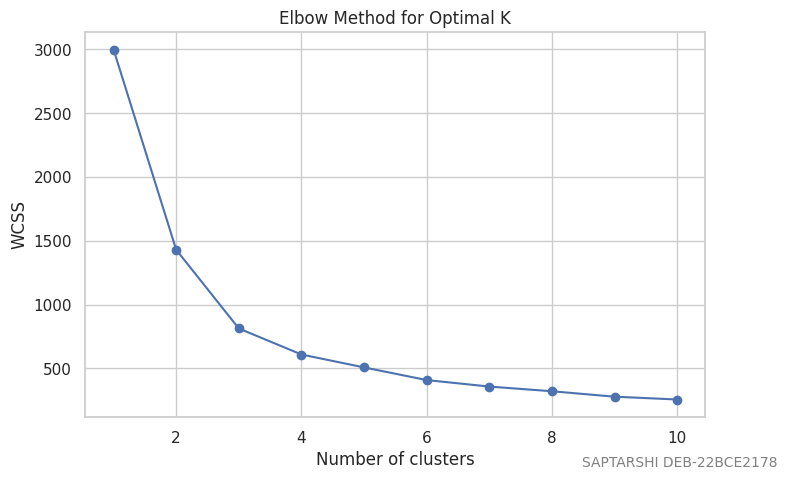

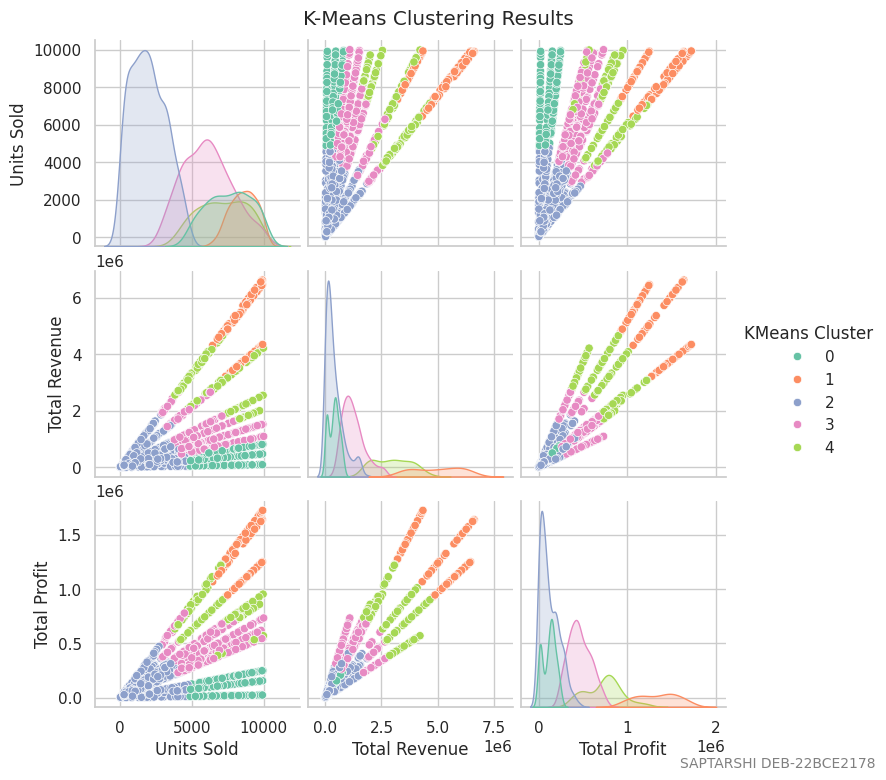

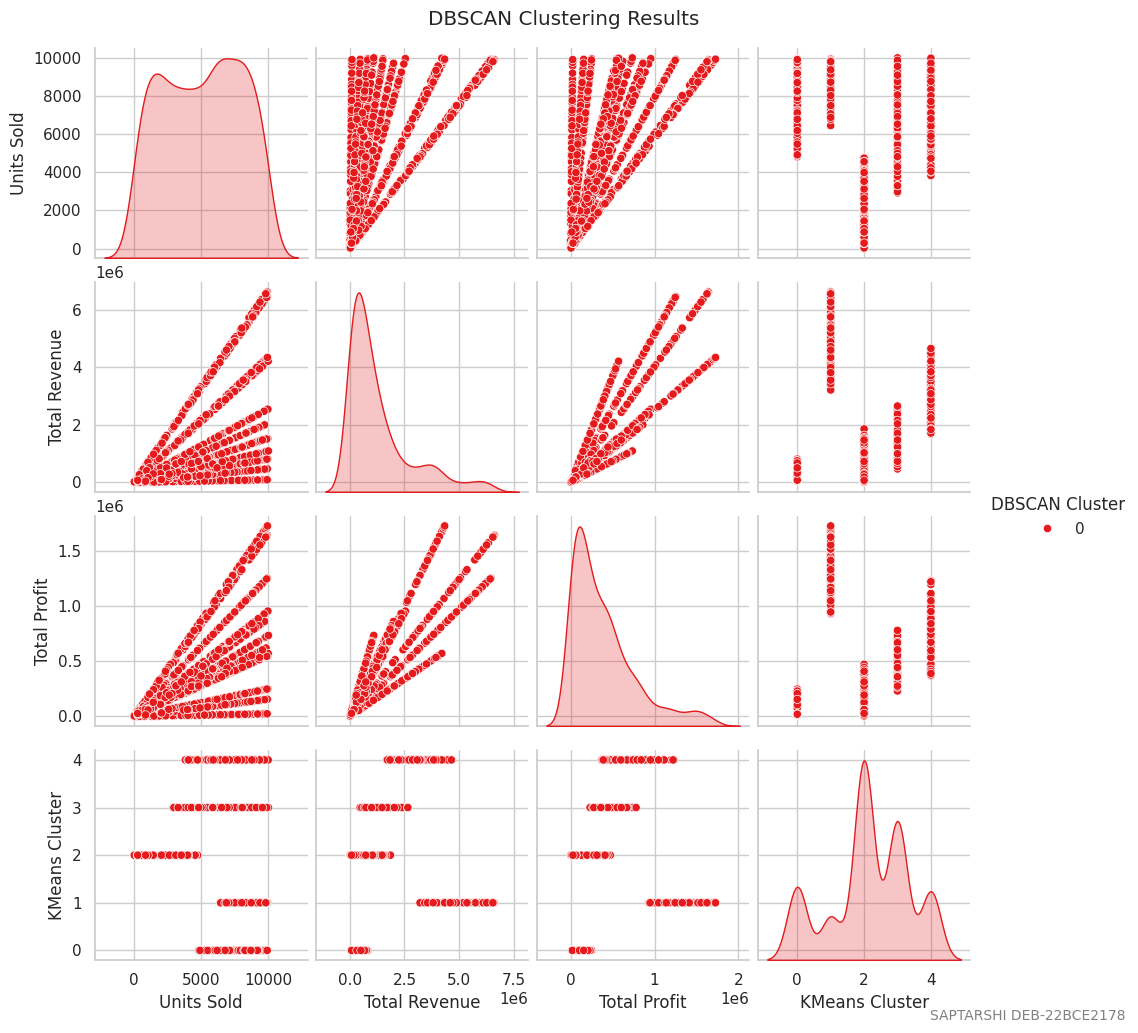

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

# Set visualization style
sns.set(style="whitegrid")

# ---------------------------------------------------------
# Set a seed for reproducibility
# Equivalent to set.seed(123) in R.
np.random.seed(123)

# ---------------------------------------------------------
# 1. Load the Dataset and Clean the Data
# ---------------------------------------------------------
# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/1000%20Sales%20Records.csv"
df = pd.read_csv(url)

# Display the first few rows, dataset information, and statistical summary to inspect data quality
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing Values in each column:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())

# ---------------------------------------------------------
# 2. Extract Relevant Features
# ---------------------------------------------------------
# For clustering, extract three key numerical features.
# Here, we choose "Units Sold", "Total Revenue", and "Total Profit".
# (These columns are selected based on their numerical nature and relevance to sales performance.)
data = df[["Units Sold", "Total Revenue", "Total Profit"]].copy()
print("\nExtracted Data (first 5 rows):")
print(data.head())

# ---------------------------------------------------------
# 3. Scale the Data
# ---------------------------------------------------------
# Scale the numerical columns so that they have a mean of 0 and standard deviation of 1.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert scaled data back to a DataFrame for easier handling and plotting
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)
print("\nScaled Data (first 5 rows):")
print(data_scaled_df.head())

# ---------------------------------------------------------
# 4. Determine the Optimal Number of Clusters Using the Elbow Method
# ---------------------------------------------------------
wcss = []  # Within-cluster sum of squares
# Try cluster numbers from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=123)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
# Annotate with your name and registration number
plt.figtext(0.99, 0.01, "SAPTARSHI DEB-22BCE2178", horizontalalignment='right', fontsize=10, color='gray')
plt.show()

# ---------------------------------------------------------
# 5. Perform K-Means Clustering
# ---------------------------------------------------------
# Apply K-Means clustering on the scaled data with 5 clusters
# The random_state parameter is set for reproducibility (seed = 123)
kmeans_result = KMeans(n_clusters=5, random_state=123)
kmeans_labels = kmeans_result.fit_predict(data_scaled)

# Add K-Means cluster labels to the data copy using .loc to avoid SettingWithCopyWarning
data.loc[:, 'KMeans Cluster'] = kmeans_labels

# Visualize the K-Means clustering results using a pairplot
sns.pairplot(data, hue='KMeans Cluster', palette="Set2", diag_kind="kde")
plt.suptitle("K-Means Clustering Results", y=1.02)
plt.figtext(0.99, 0.01, "SAPTARSHI DEB-22BCE2178", horizontalalignment='right', fontsize=10, color='gray')
plt.show()

# ---------------------------------------------------------
# 6. Apply DBSCAN Clustering
# ---------------------------------------------------------
# Initialize and apply DBSCAN with epsilon = 0.5 and min_samples = 5 on the scaled data
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(data_scaled)

# Add DBSCAN cluster labels to the data copy using .loc
data.loc[:, 'DBSCAN Cluster'] = dbscan_labels

# Visualize the DBSCAN clustering results using a pairplot
sns.pairplot(data, hue='DBSCAN Cluster', palette="Set1", diag_kind="kde")
plt.suptitle("DBSCAN Clustering Results", y=1.02)
plt.figtext(0.99, 0.01, "SAPTARSHI DEB-22BCE2178", horizontalalignment='right', fontsize=10, color='gray')
plt.show()


First 5 rows of the dataset:
                         Region Country   Item Type Sales Channel  \
0  Middle East and North Africa   Libya   Cosmetics       Offline   
1                 North America  Canada  Vegetables        Online   
2  Middle East and North Africa   Libya   Baby Food       Offline   
3                          Asia   Japan      Cereal       Offline   
4            Sub-Saharan Africa    Chad      Fruits       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M  10/18/2014  686800706  10/31/2014        8446      437.20   
1              M   11/7/2011  185941302   12/8/2011        3018      154.06   
2              C  10/31/2016  246222341   12/9/2016        1517      255.28   
3              C   4/10/2010  161442649   5/12/2010        3322      205.70   
4              H   8/16/2011  645713555   8/31/2011        9845        9.33   

   Unit Cost  Total Revenue  Total Cost  Total Profit  
0     263.33     3692591.

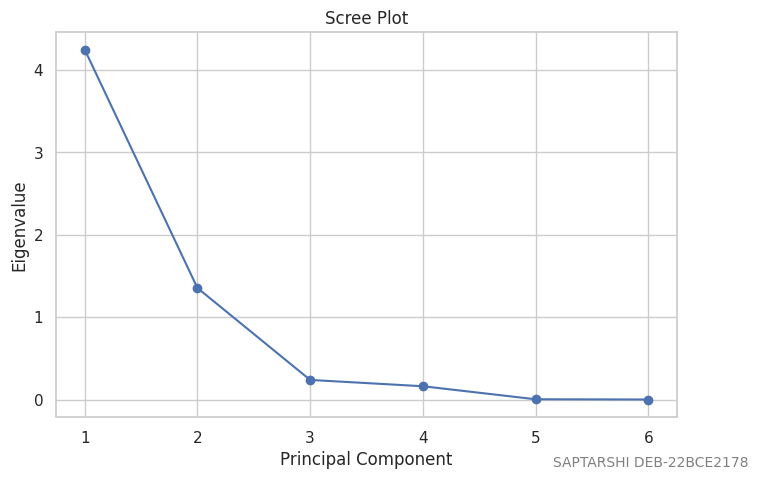

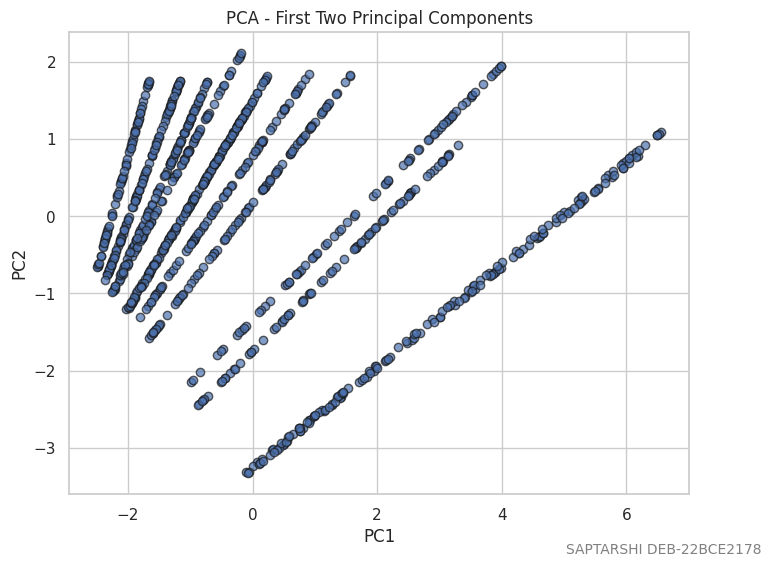

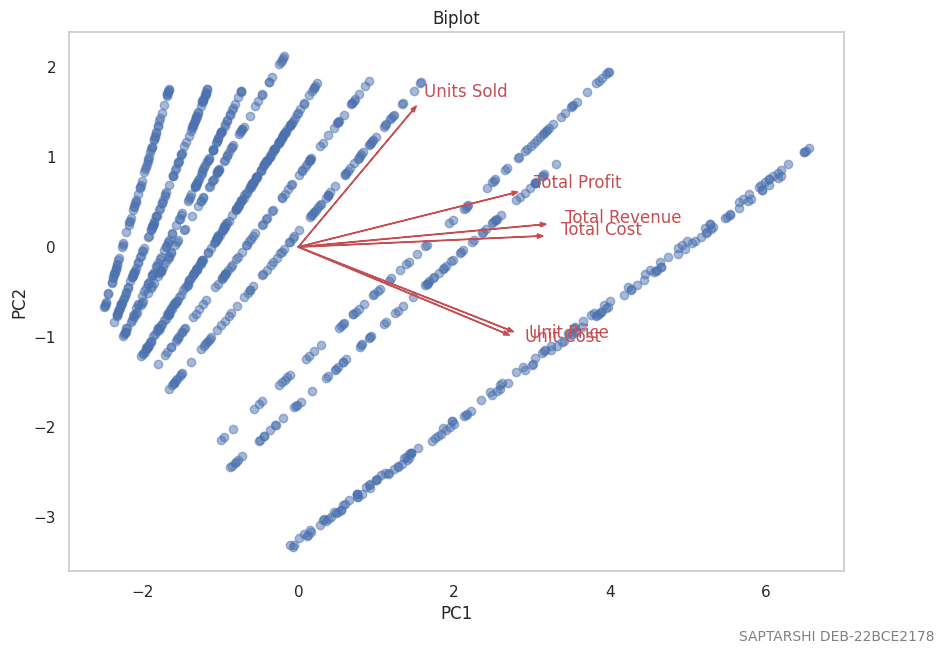


PCA Summary:
Explained variance ratio (selected components): [0.70763708 0.22548357]
Cumulative variance explained: [0.70763708 0.93312065]


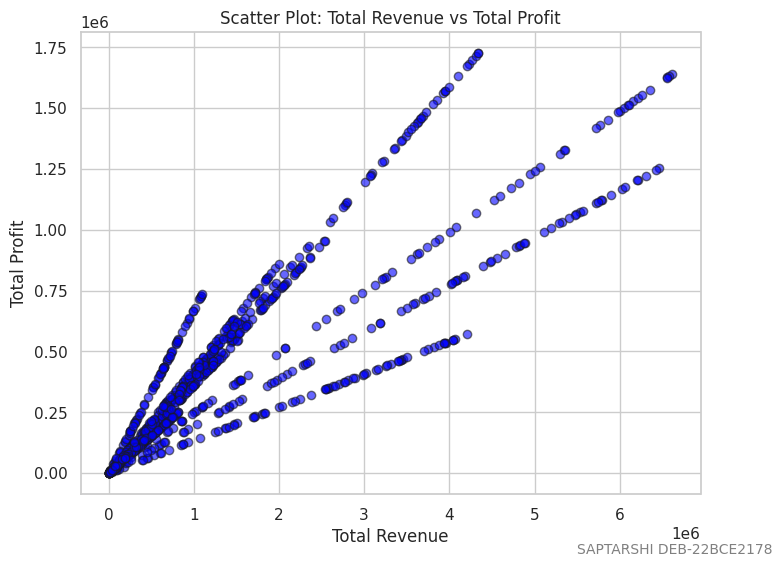


Simple Linear Regression Model (reg1):
Intercept: 91480.07359701494
Coefficient: [0.22648966]

Residuals (first 10 values):
704    -69125.625640
960    -48726.577745
979    -30872.520500
711    234499.414798
121     85835.641446
712    168033.413649
543     79240.843520
478    -87313.794066
623     74083.201134
492     34505.869954
Name: Total Profit, dtype: float64


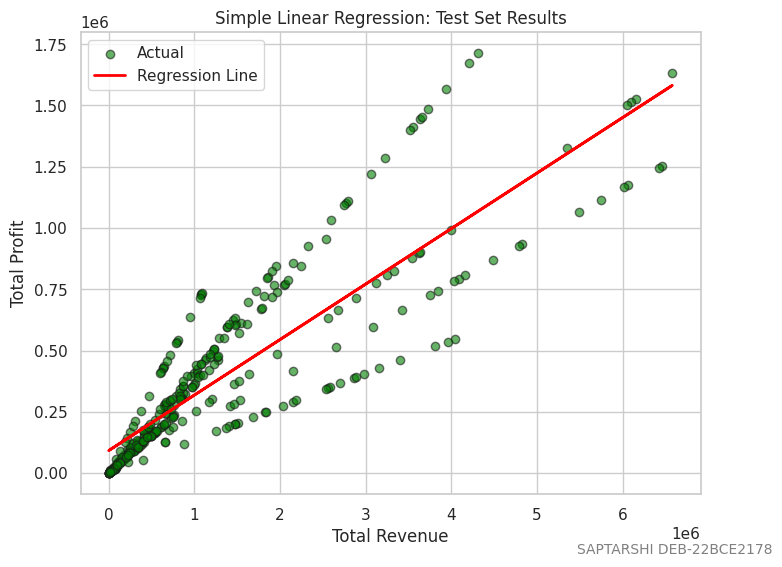


Multiple Linear Regression with Log Transformation (reg2) Summary:
                            OLS Regression Results                            
Dep. Variable:           Total Profit   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     901.6
Date:                Sat, 29 Mar 2025   Prob (F-statistic):          2.84e-283
Time:                        14:42:51   Log-Likelihood:                -13620.
No. Observations:                1000   AIC:                         2.725e+04
Df Residuals:                     996   BIC:                         2.727e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

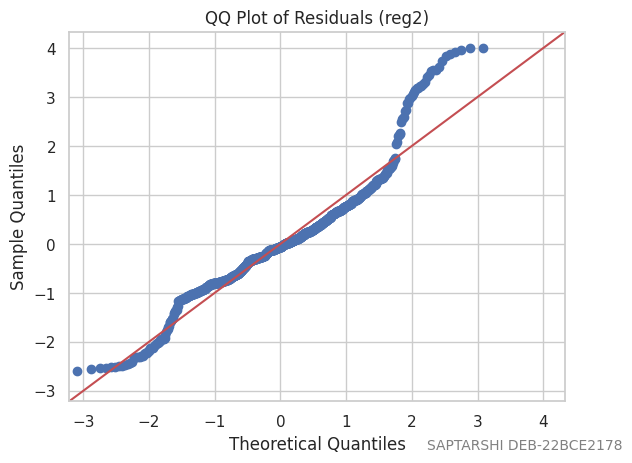

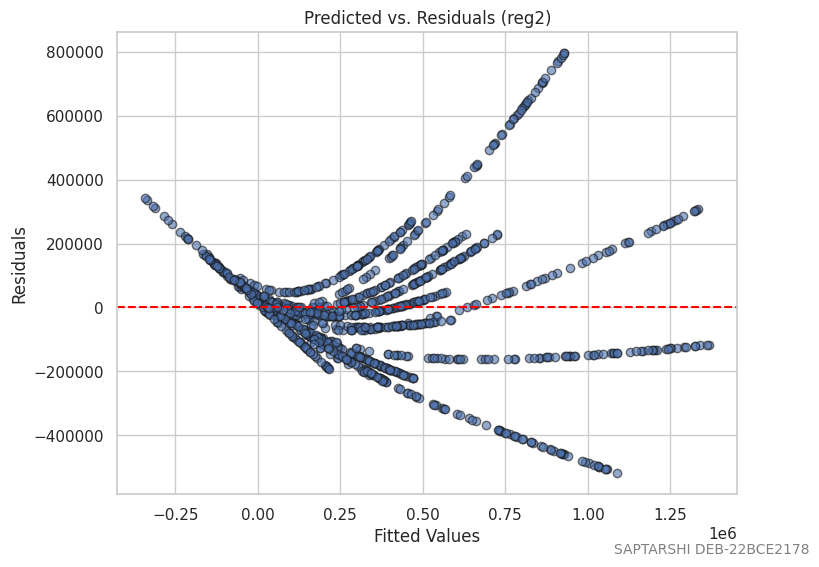

In [ ]:
# =====================================================
# Part 1: Principal Component Analysis (PCA) on Sales Records
# =====================================================

# 1. Install and load necessary libraries for data import, visualization, and PCA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set the style for plots
sns.set(style="whitegrid")

# -----------------------------------------------------
# 2. Load the "1000 Sales Records" dataset
# -----------------------------------------------------
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/1000%20Sales%20Records.csv"
df = pd.read_csv(url)

# Inspect the dataset structure (view first few rows and data types)
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())

# -----------------------------------------------------
# 3. Select numeric columns for PCA
# We'll use the following numeric columns:
# "Units Sold", "Unit Price", "Unit Cost", "Total Revenue", "Total Cost", "Total Profit"
numeric_cols = ["Units Sold", "Unit Price", "Unit Cost", "Total Revenue", "Total Cost", "Total Profit"]
data_numeric = df[numeric_cols].copy()

# -----------------------------------------------------
# 4. Scale the data and perform PCA on numeric columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform PCA without limiting the number of components first (to examine eigenvalues)
pca_full = PCA()
pca_full.fit(data_scaled)

# Eigenvalues (explained variances) and component loadings
eigenvalues = pca_full.explained_variance_
explained_var_ratio = pca_full.explained_variance_ratio_
components = pca_full.components_

print("\nEigenvalues:")
print(eigenvalues)
print("\nExplained Variance Ratio:")
print(explained_var_ratio)
print("\nPCA Component Loadings:")
print(components)

# -----------------------------------------------------
# 5. Visualize PCA components: Scree plot and biplot
# -----------------------------------------------------
# (a) Scree plot to determine the optimal number of principal components.
plt.figure(figsize=(8, 5))
num_components = len(eigenvalues)
plt.plot(range(1, num_components + 1), eigenvalues, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.figtext(0.99, 0.01, "SAPTARSHI DEB-22BCE2178", horizontalalignment='right', fontsize=10, color='gray')
plt.show()

# -----------------------------------------------------
# 6. Select the desired number of components based on the scree plot
# For demonstration, we select 2 components (n_comp = 2)
n_comp = 2
pca = PCA(n_components=n_comp)
data_pca = pca.fit_transform(data_scaled)

# -----------------------------------------------------
# 7. Plot the selected PCA components using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.7, edgecolor='k')
plt.title("PCA - First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.figtext(0.99, 0.01, "SAPTARSHI DEB-22BCE2178", horizontalalignment='right', fontsize=10, color='gray')
plt.show()

# -----------------------------------------------------
# 8. Create a Biplot (scatter of observations with arrows for loadings)
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    plt.figure(figsize=(10, 7))
    plt.scatter(xs, ys, alpha=0.5)
    for i in range(n):
        # Scale the arrow for better visualization
        plt.arrow(0, 0, coeff[i, 0]*max(xs), coeff[i, 1]*max(ys),
                  color='r', width=0.005, head_width=0.05)
        if labels is None:
            plt.text(coeff[i, 0]*max(xs)*1.1, coeff[i, 1]*max(ys)*1.1, "Var"+str(i+1), color='r')
        else:
            plt.text(coeff[i, 0]*max(xs)*1.1, coeff[i, 1]*max(ys)*1.1, labels[i], color='r')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Biplot")
    plt.figtext(0.99, 0.01, "SAPTARSHI DEB-22BCE2178", horizontalalignment='right', fontsize=10, color='gray')
    plt.grid()
    plt.show()

# Use biplot function with component loadings and variable names.
biplot(data_pca, np.transpose(pca.components_), labels=numeric_cols)

# -----------------------------------------------------
# 9. Interpret the PCA results using summary-like output
print("\nPCA Summary:")
print("Explained variance ratio (selected components):", pca.explained_variance_ratio_)
print("Cumulative variance explained:", np.cumsum(pca.explained_variance_ratio_))


# =====================================================
# Part 2: Simple Linear Regression on Sales Records
# =====================================================

# For simple linear regression, we'll choose:
# Independent variable (X): "Total Revenue"
# Dependent variable (Y): "Total Profit"
# -----------------------------------------------------
# 1. Select and clean the required columns (if needed)
df_reg = df[["Total Revenue", "Total Profit"]].dropna().copy()

# 2. Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_reg["Total Revenue"], df_reg["Total Profit"], color='blue', alpha=0.6, edgecolor='k')
plt.title("Scatter Plot: Total Revenue vs Total Profit")
plt.xlabel("Total Revenue")
plt.ylabel("Total Profit")
plt.figtext(0.99, 0.01, "SAPTARSHI DEB-22BCE2178", horizontalalignment='right', fontsize=10, color='gray')
plt.show()

# -----------------------------------------------------
# 3. Split the dataset into Training (2/3) and Test set (1/3)
from sklearn.model_selection import train_test_split

X = df_reg[["Total Revenue"]]
y = df_reg["Total Profit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=123)

# -----------------------------------------------------
# 4. Fit Simple Linear Regression on the Training set
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

# Print the model coefficients and intercept
print("\nSimple Linear Regression Model (reg1):")
print("Intercept:", reg1.intercept_)
print("Coefficient:", reg1.coef_)

# -----------------------------------------------------
# 5. Check residuals (we can compute residuals on the training set)
y_train_pred = reg1.predict(X_train)
residuals = y_train - y_train_pred
print("\nResiduals (first 10 values):")
print(residuals.head(10))

# -----------------------------------------------------
# 6. Predict the Test set results
y_pred = reg1.predict(X_test)

# -----------------------------------------------------
# 7. Visualize the test set results with the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='green', alpha=0.6, edgecolor='k', label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.title("Simple Linear Regression: Test Set Results")
plt.xlabel("Total Revenue")
plt.ylabel("Total Profit")
plt.legend()
plt.figtext(0.99, 0.01, "SAPTARSHI DEB-22BCE2178", horizontalalignment='right', fontsize=10, color='gray')
plt.show()


# =====================================================
# Part 3: Multiple Linear Regression with Log Transformation
# =====================================================

# For multiple linear regression, we'll predict "Total Profit" using several features.
# We'll use:
# - "Units Sold"
# - log-transformed "Total Revenue" (using log(Total Revenue))
# - "Total Cost"
# Ensure no zero or negative values for log transformation
df_mlr = df[["Units Sold", "Total Revenue", "Total Cost", "Total Profit"]].dropna().copy()
df_mlr = df_mlr[df_mlr["Total Revenue"] > 0]  # Filter out non-positive revenues
df_mlr["Log_Total_Revenue"] = np.log(df_mlr["Total Revenue"])

# Define independent variables (X) and dependent variable (y)
X_mlr = df_mlr[["Units Sold", "Log_Total_Revenue", "Total Cost"]]
y_mlr = df_mlr["Total Profit"]

# -----------------------------------------------------
# Fit the multiple linear regression model using statsmodels for detailed summary
import statsmodels.api as sm

# Add a constant for the intercept
X_mlr_const = sm.add_constant(X_mlr)
reg2 = sm.OLS(y_mlr, X_mlr_const).fit()

print("\nMultiple Linear Regression with Log Transformation (reg2) Summary:")
print(reg2.summary())

# -----------------------------------------------------
# Compare predicted and residual values
fitted_values = reg2.fittedvalues
residual_values = reg2.resid

# Combine predicted and residual values into a single dataframe
results_df = pd.DataFrame({
    "Fitted": fitted_values,
    "Residuals": residual_values
})
print("\nCombined DataFrame of Predicted and Residual Values (first 10 rows):")
print(results_df.head(10))

# -----------------------------------------------------
# Visualize regression diagnostics using a QQ plot for residuals
sm.qqplot(residual_values, line='45', fit=True)
plt.title("QQ Plot of Residuals (reg2)")
plt.figtext(0.99, 0.01, "SAPTARSHI DEB-22BCE2178", horizontalalignment='right', fontsize=10, color='gray')
plt.show()

# Alternatively, visualize predicted vs. residuals using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residual_values, alpha=0.6, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Predicted vs. Residuals (reg2)")
plt.figtext(0.99, 0.01, "SAPTARSHI DEB-22BCE2178", horizontalalignment='right', fontsize=10, color='gray')
plt.show()
